In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('C:/Users/JAAME/Downloads/covid_19_data.csv')

In [3]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       306429 non-null  datetime64[ns]
 1   State      228326 non-null  object        
 2   Country    306429 non-null  object        
 3   Confirmed  306429 non-null  float64       
 4   Deaths     306429 non-null  float64       
 5   Recovered  306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


In [6]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [7]:
df3 = df2.groupby(['Country','Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()
df3[['Confirmed', 'Deaths', 'Recovered']] = df3[['Confirmed', 'Deaths', 'Recovered']].astype(int)

In [8]:
df3.head(50)

Country       Date  Confirmed  Deaths  Recovered
0        Azerbaijan 2020-02-28          1       0          0
1   ('St. Martin',) 2020-03-10          2       0          0
2       Afghanistan 2020-02-24          1       0          0
3       Afghanistan 2020-02-25          1       0          0
4       Afghanistan 2020-02-26          1       0          0
5       Afghanistan 2020-02-27          1       0          0
6       Afghanistan 2020-02-28          1       0          0
7       Afghanistan 2020-02-29          1       0          0
8       Afghanistan 2020-03-01          1       0          0
9       Afghanistan 2020-03-02          1       0          0
10      Afghanistan 2020-03-03          2       0          0
11      Afghanistan 2020-03-04          4       0          0
12      Afghanistan 2020-03-05          4       0          0
13      Afghanistan 2020-03-06          4       0          0
14      Afghanistan 2020-03-07          4       0          0
15      Afghanistan 2020-03-08          5       0          0
16      Afghanistan 2020-03-09          7       0          0
17      Afghanistan 2020-03-10          8       0          0
18      Afghanistan 2020-03-11         11       0          0
19      Afghanistan 2020-03-12         12       0          0
20      Afghanistan 2020-03-13         13       0          0
21      Afghanistan 2020-03-14         15       0          0
22      Afghanistan 2020-03-15         16       0          0
23      Afghanistan 2020-03-16         18       0          1
24      Afghanistan 2020-03-17         20       0          1
25      Afghanistan 2020-03-18         24       0          1
26      Afghanistan 2020-03-19         25       0          1
27      Afghanistan 2020-03-20         29       0          1
28      Afghanistan 2020-03-21         30       0          1
29      Afghanistan 2020-03-22         34       1          1
30      Afghanistan 2020-03-23         41       1          1
31      Afghanistan 2020-03-24         43       1          1
32      Afghanistan 2020-03-25         76       2          2
33      Afghanistan 2020-03-26         80       3          2
34      Afghanistan 2020-03-27         91       3          2
35      Afghanistan 2020-03-28        107       4          2
36      Afghanistan 2020-03-29        118       4          2
37      Afghanistan 2020-03-30        146       4          2
38      Afghanistan 2020-03-31        175       4          5
39      Afghanistan 2020-04-01        197       4          5
40      Afghanistan 2020-04-02        240       4         10
41      Afghanistan 2020-04-03        275       8         10
42      Afghanistan 2020-04-04        300      10         10
43      Afghanistan 2020-04-05        338      12         15
44      Afghanistan 2020-04-06        368      15         18
45      Afghanistan 2020-04-07        424      16         18
46      Afghanistan 2020-04-08        445      16         29
47      Afghanistan 2020-04-09        485      17         32
48      Afghanistan 2020-04-10        532      18         32
49      Afghanistan 2020-04-11        556      18         32

In [9]:
countries = df3['Country'].unique()
len(countries)

229

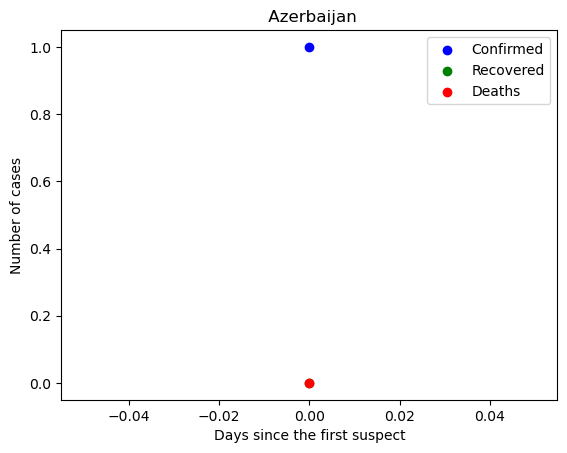

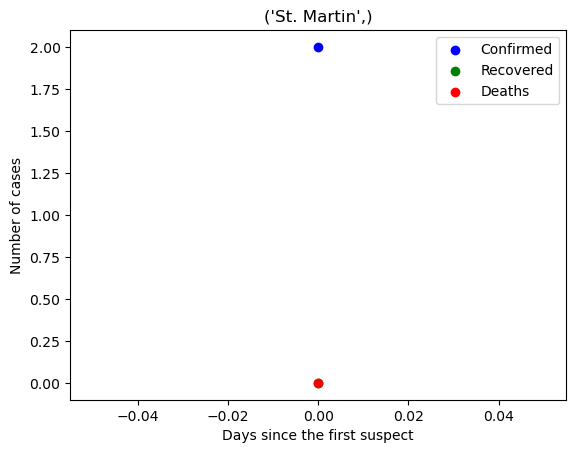

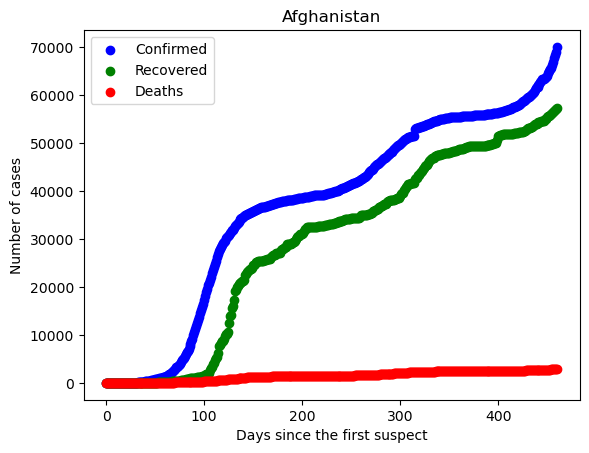

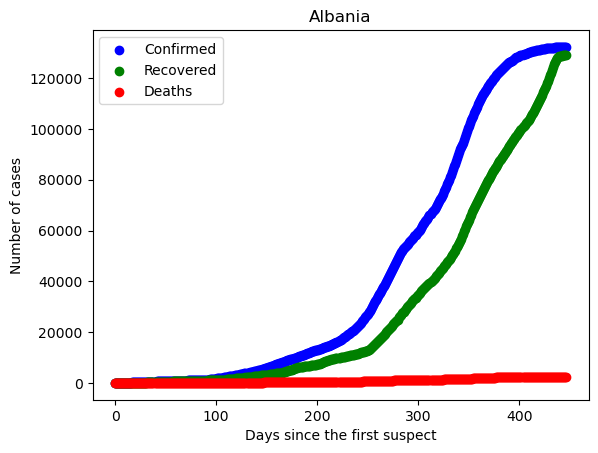

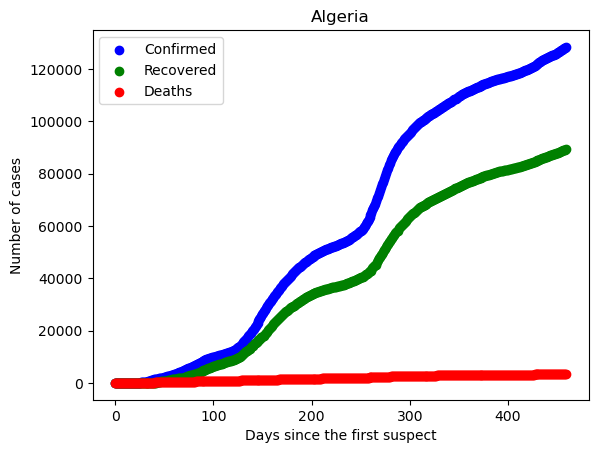

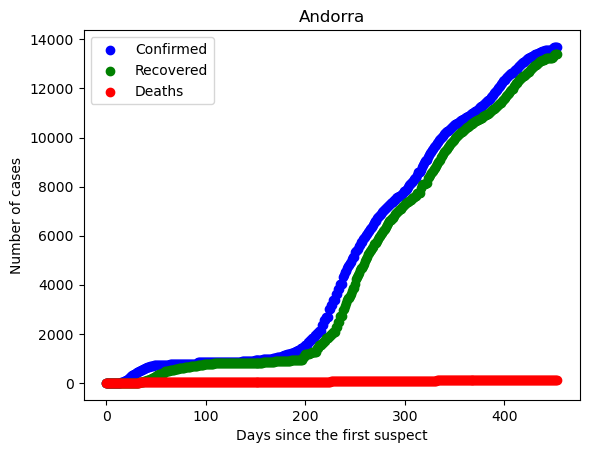

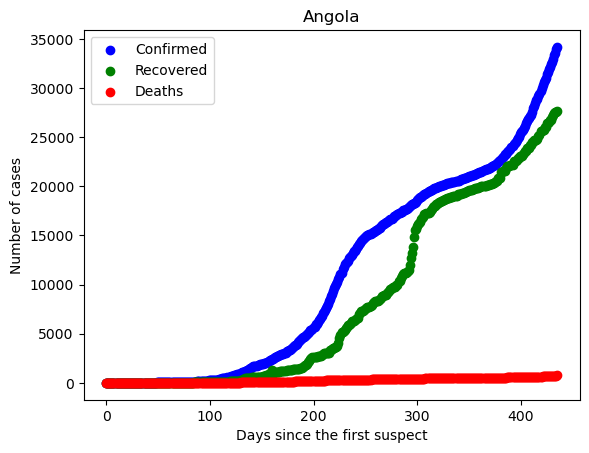

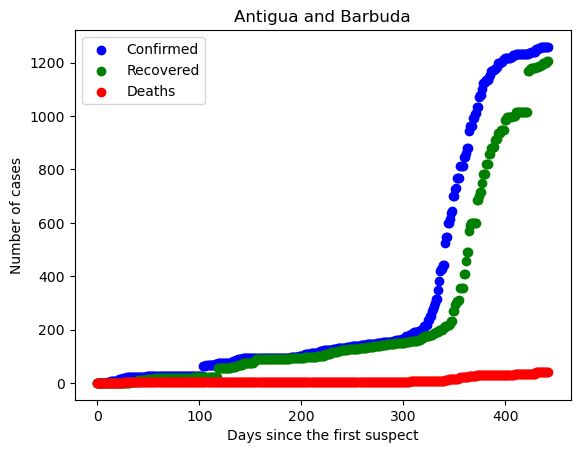

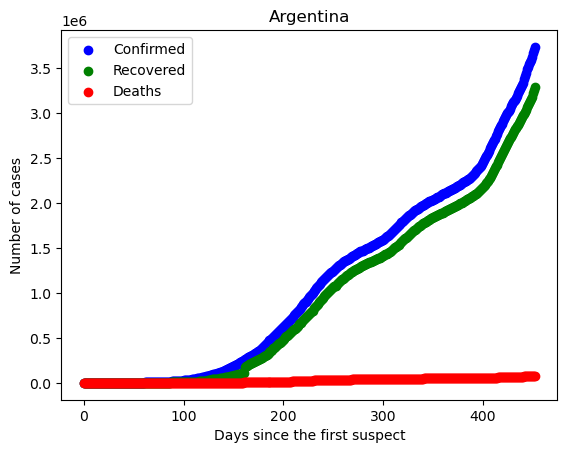

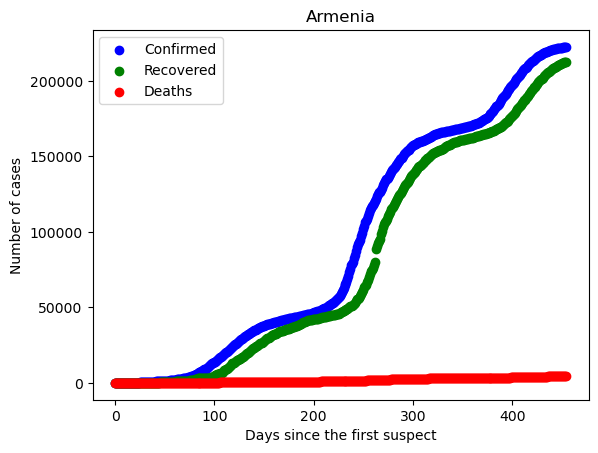

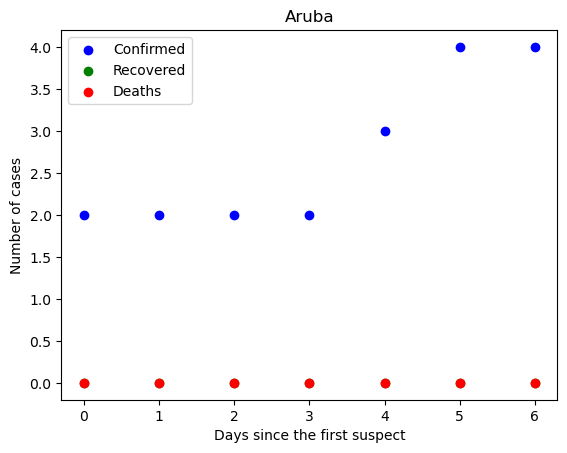

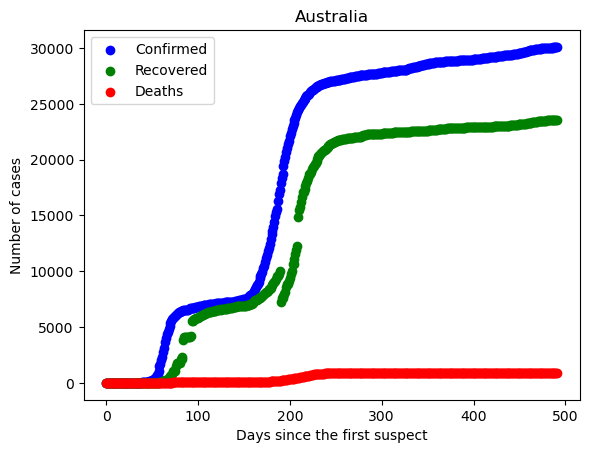

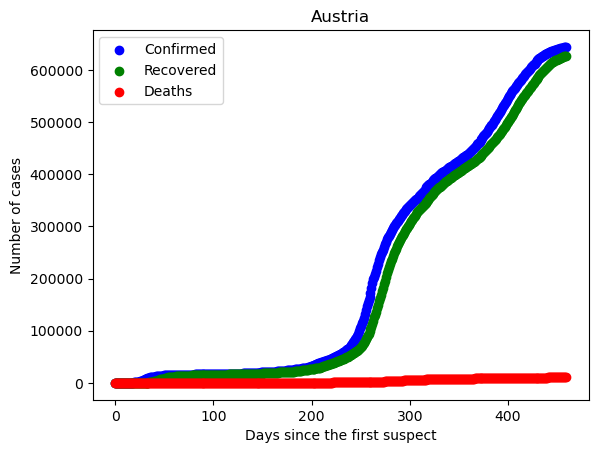

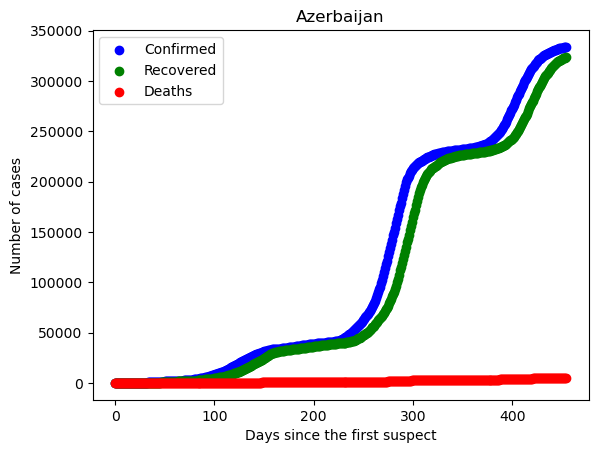

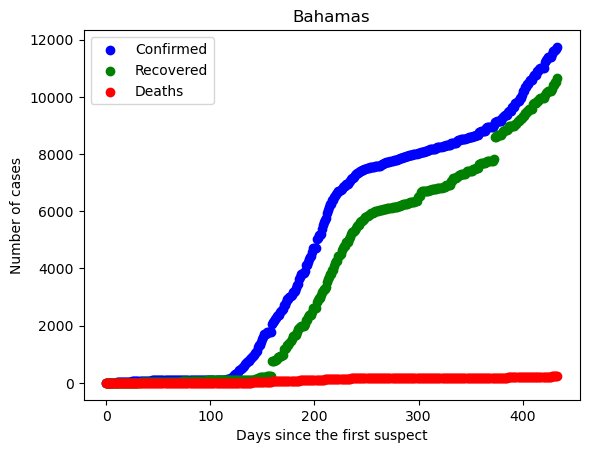

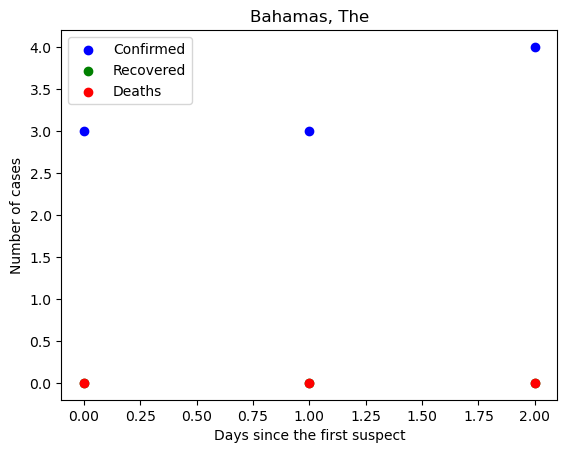

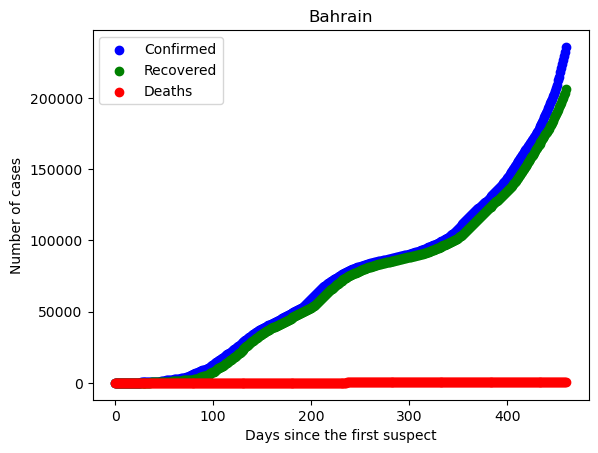

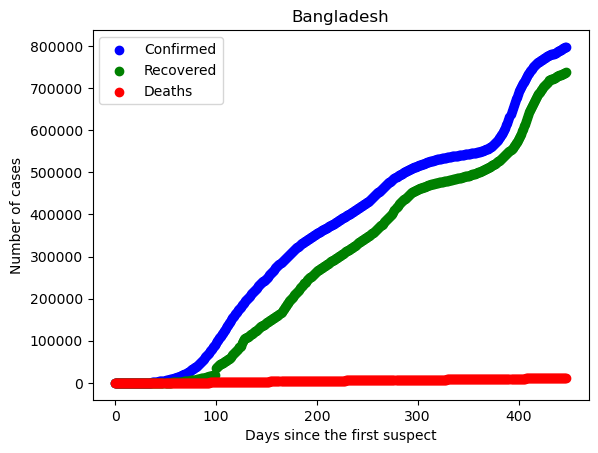

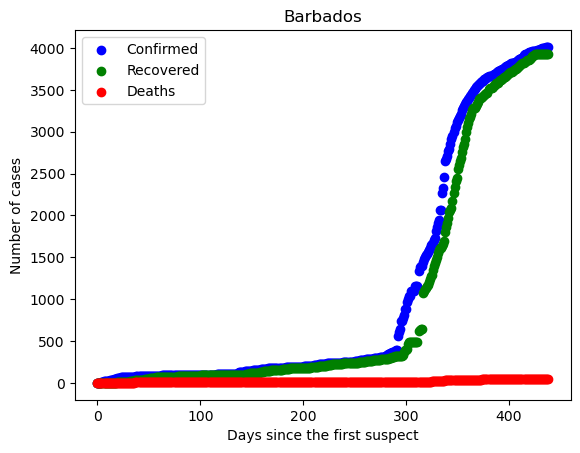

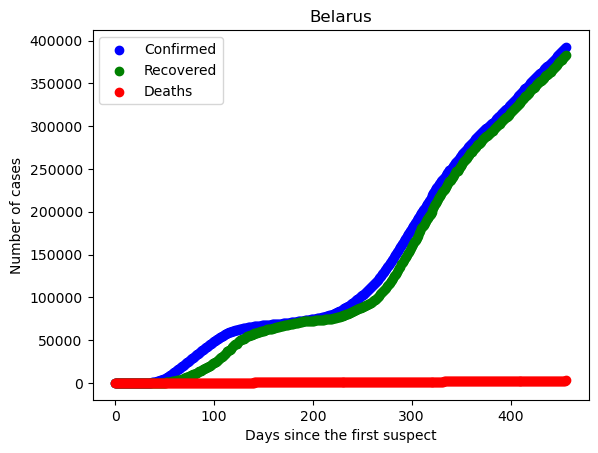

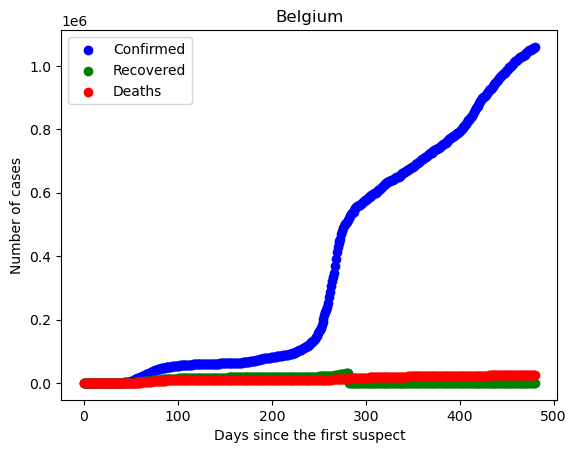

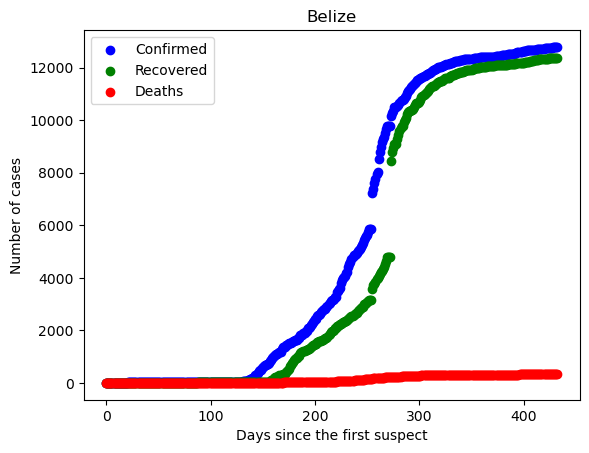

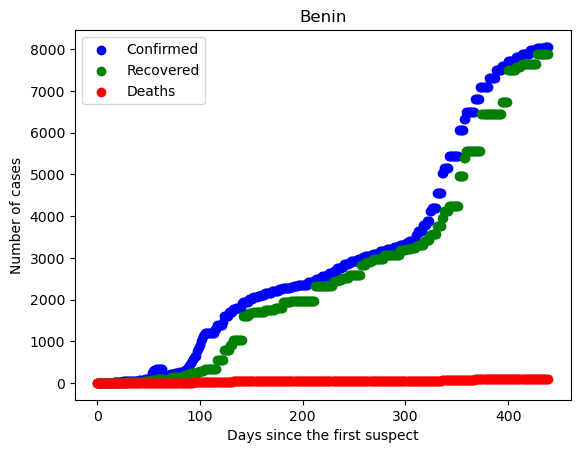

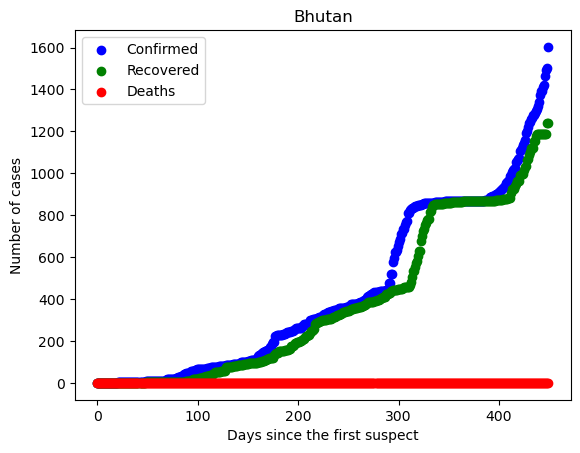

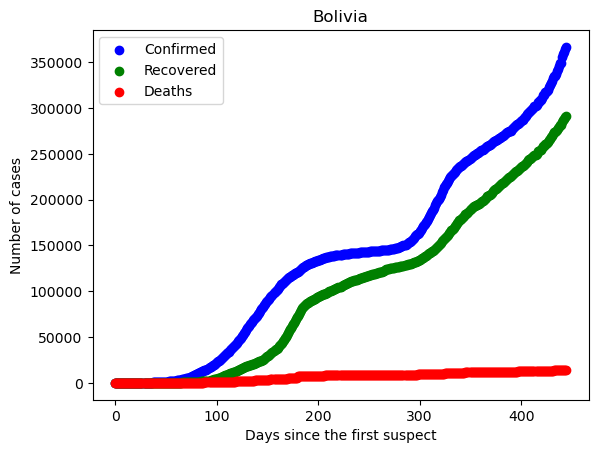

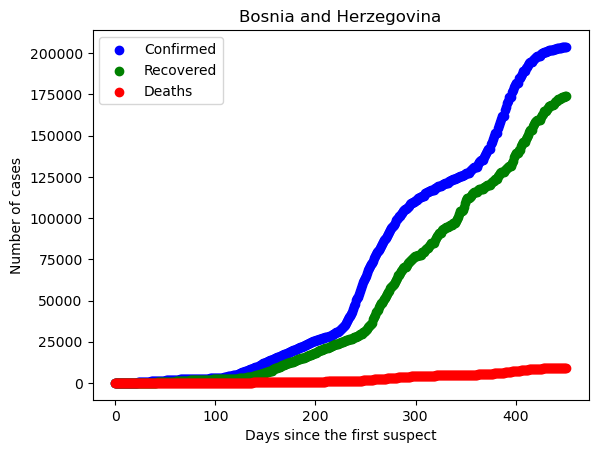

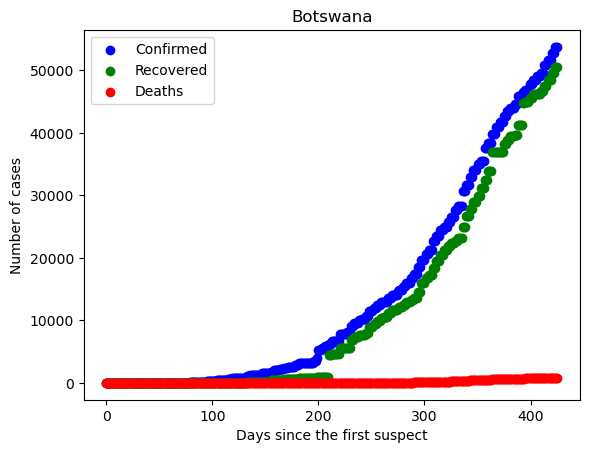

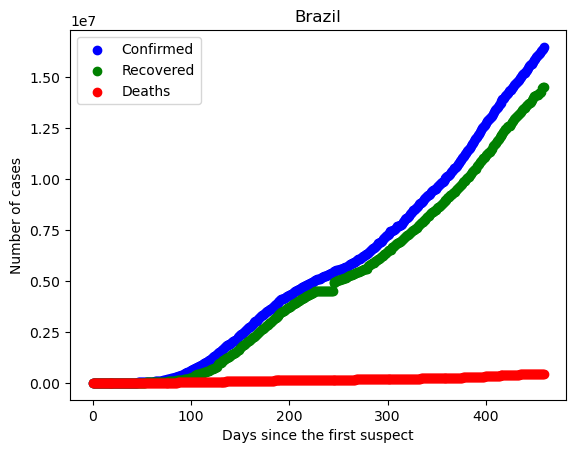

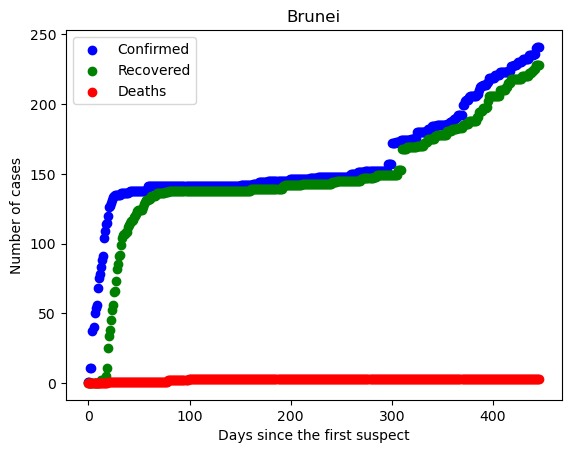

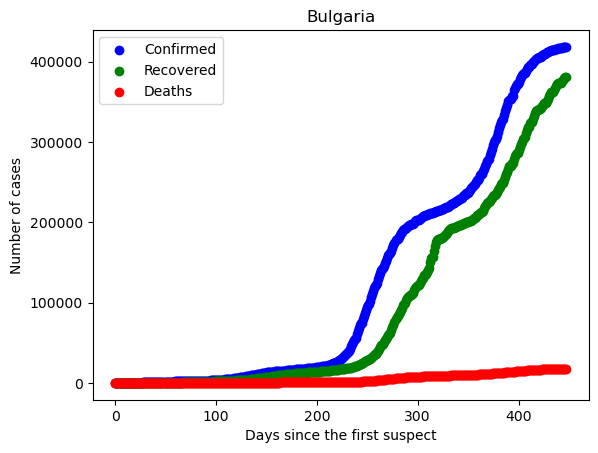

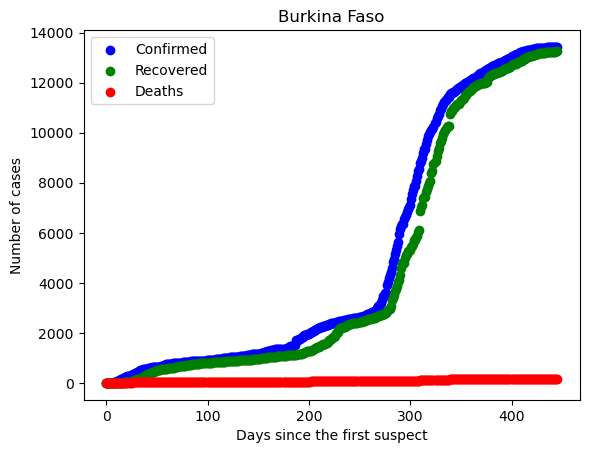

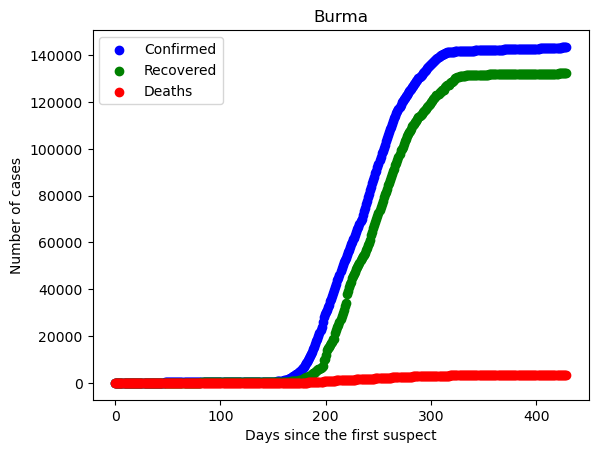

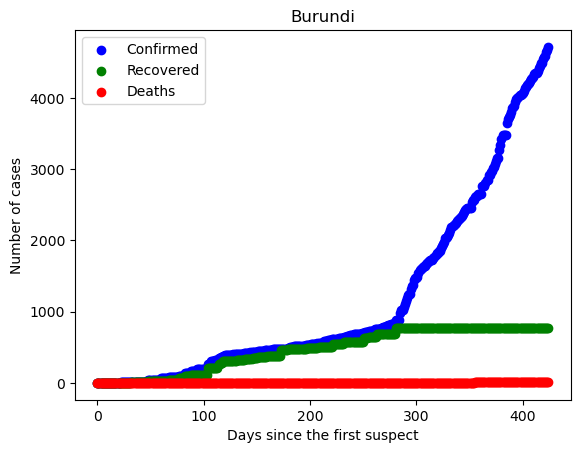

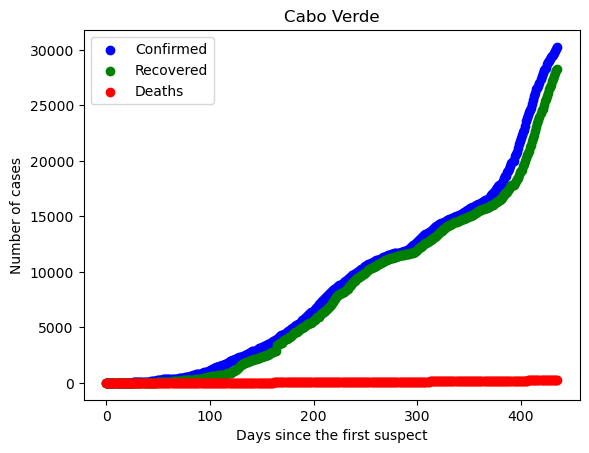

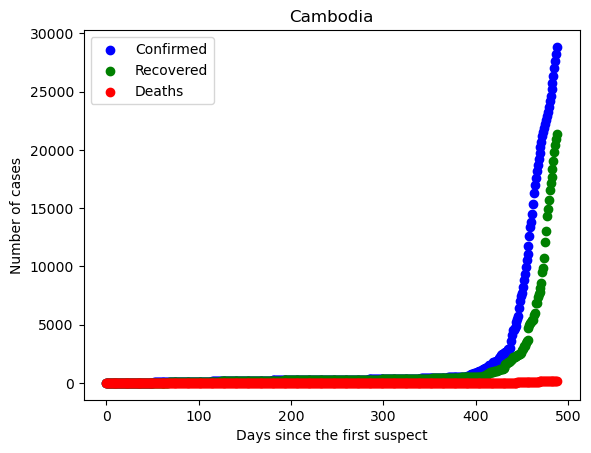

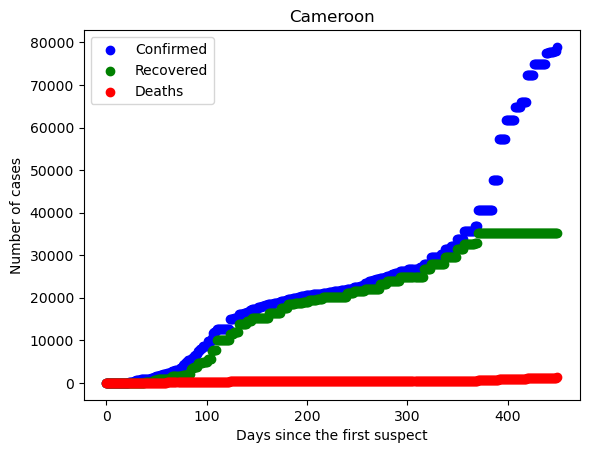

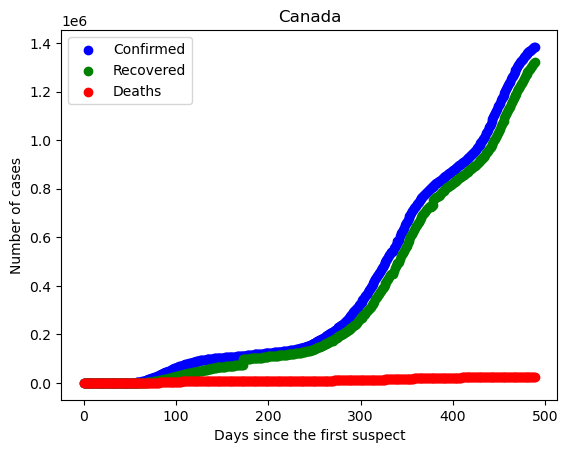

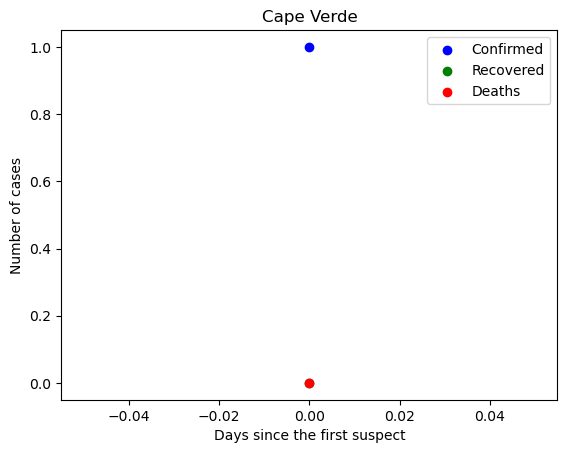

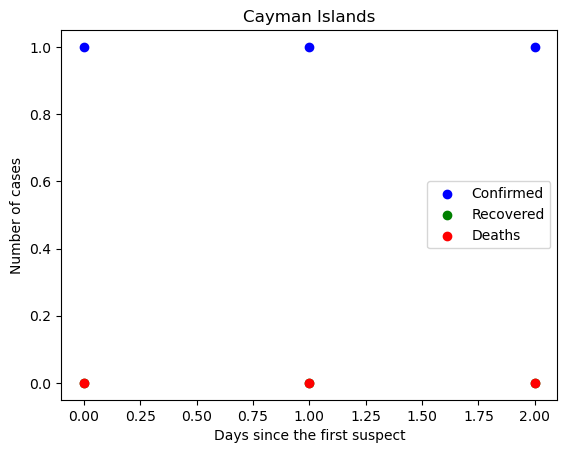

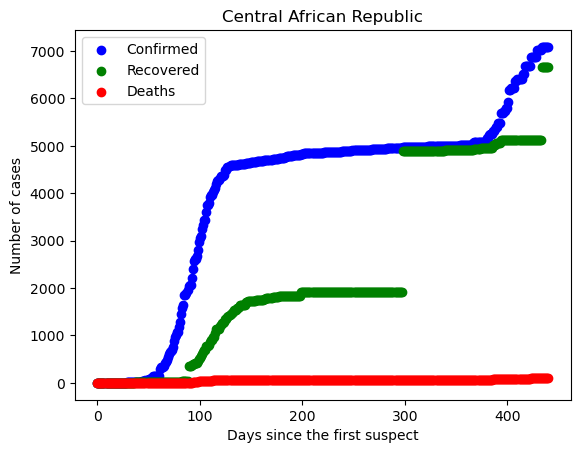

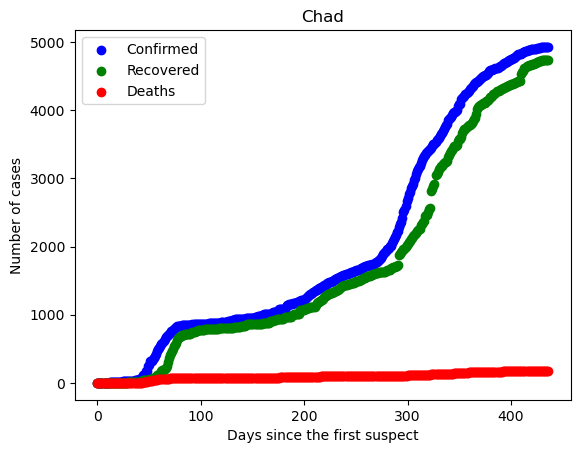

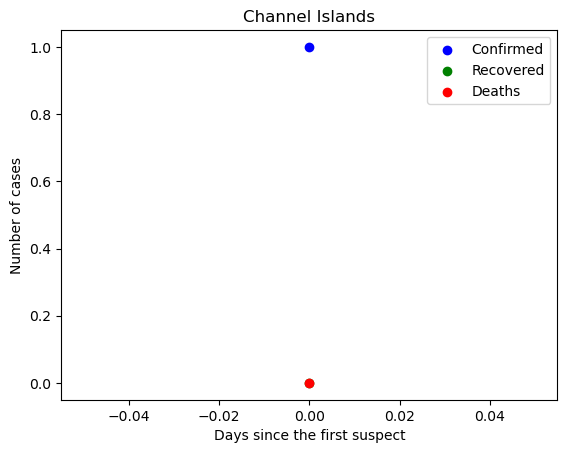

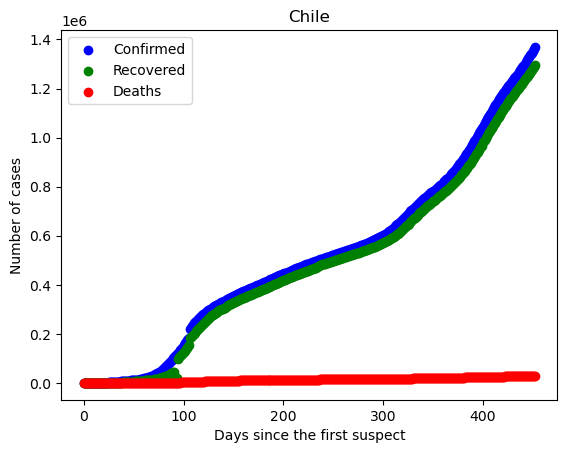

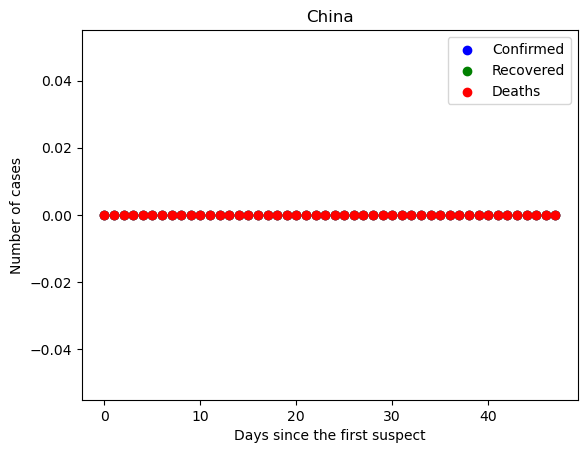

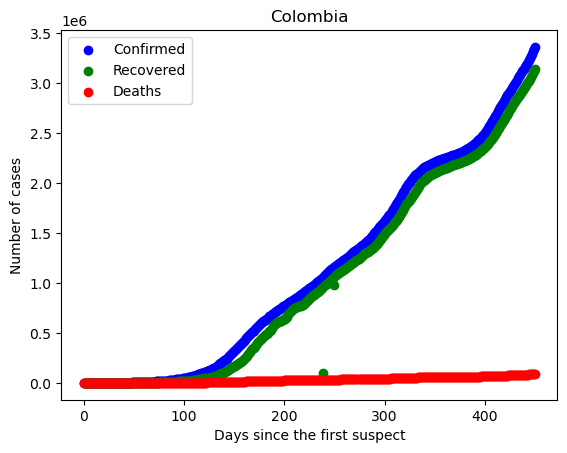

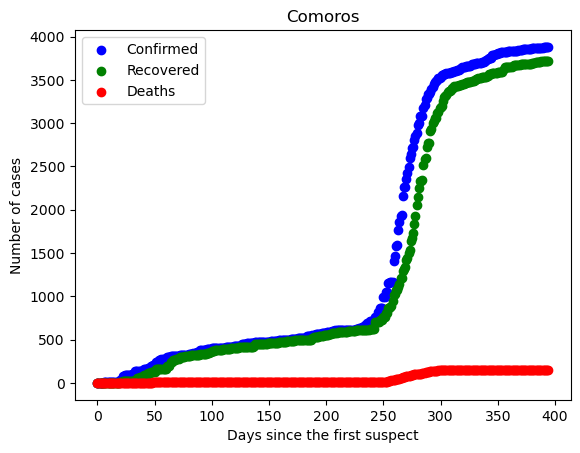

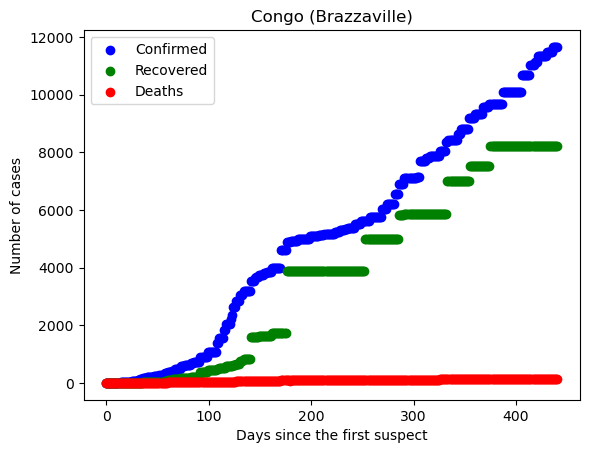

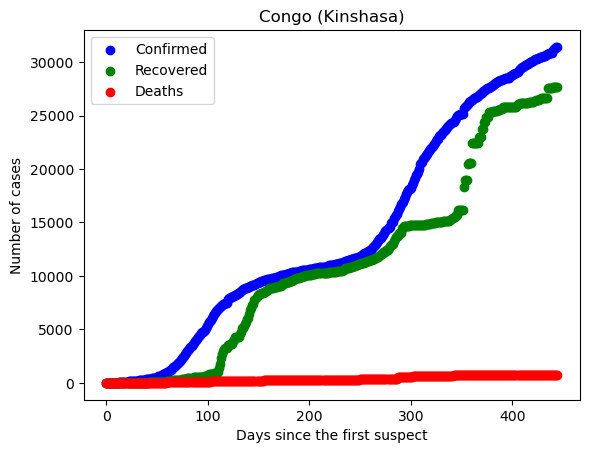

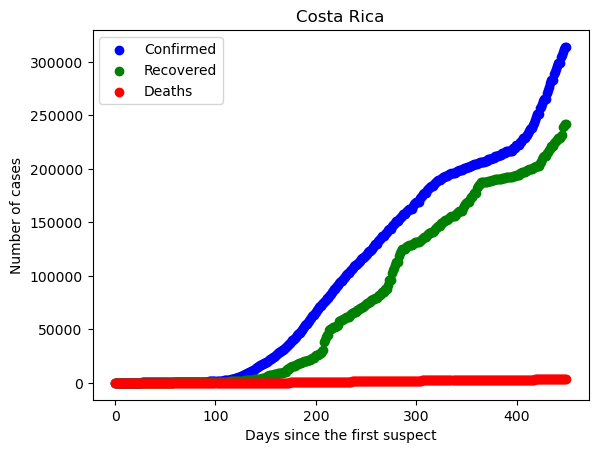

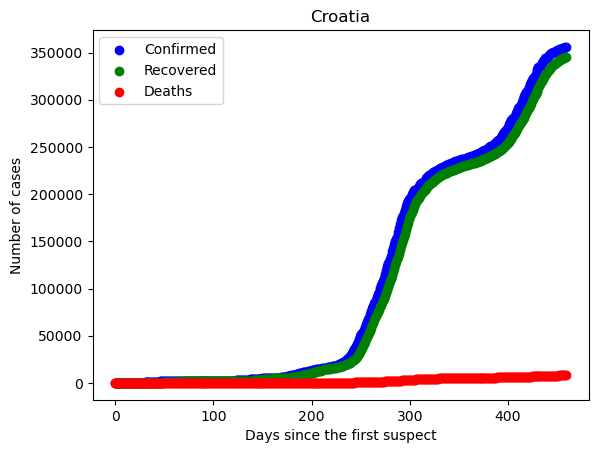

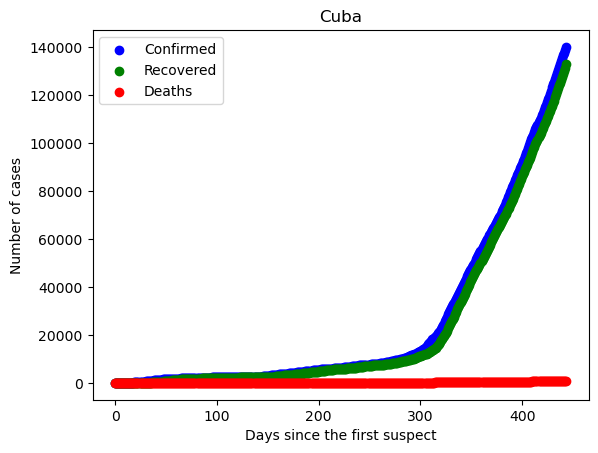

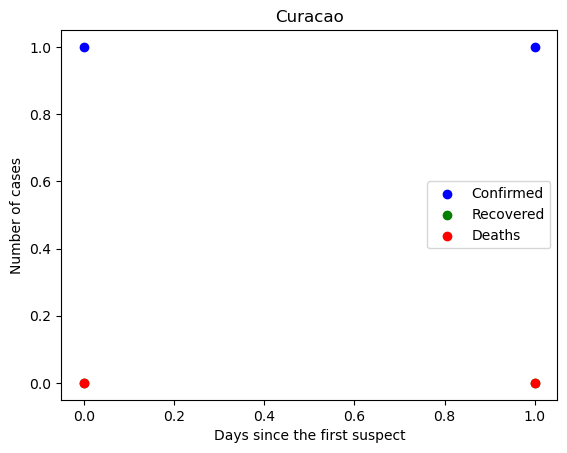

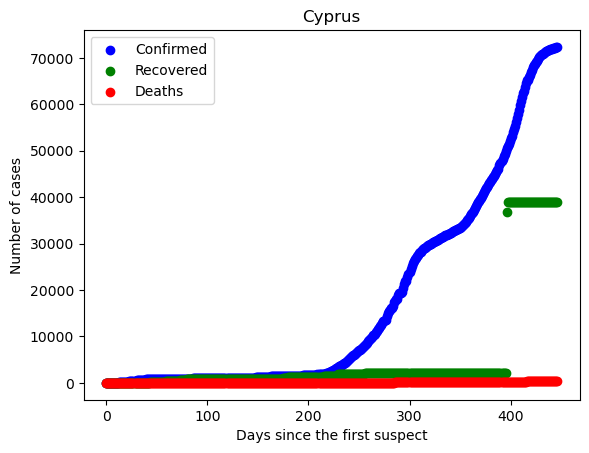

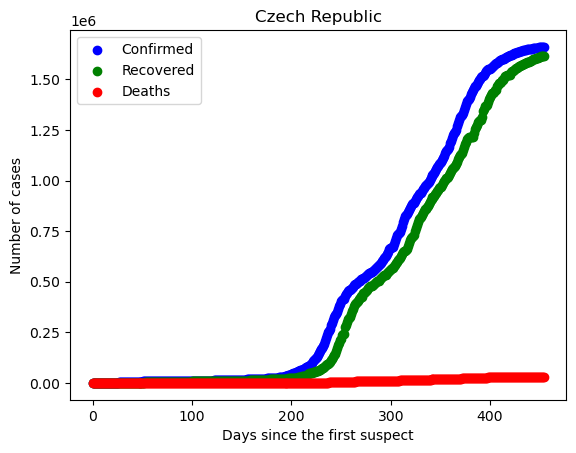

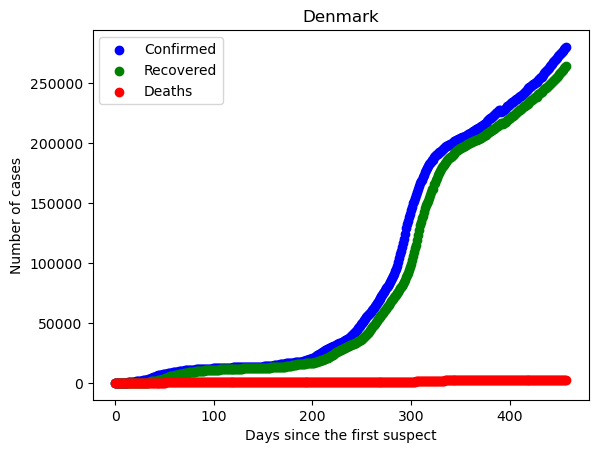

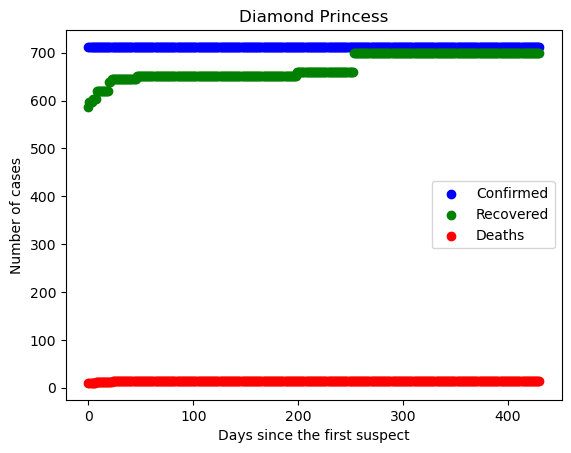

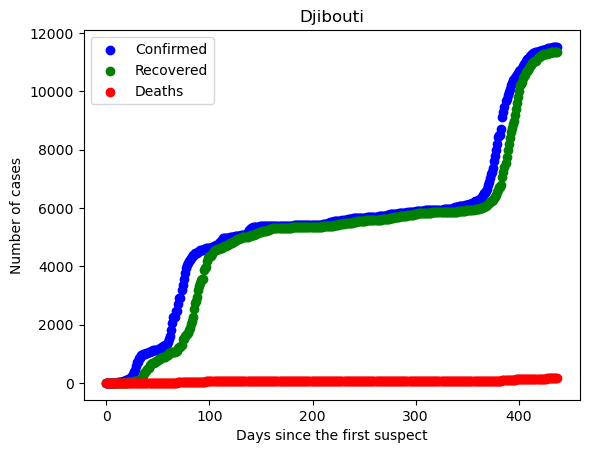

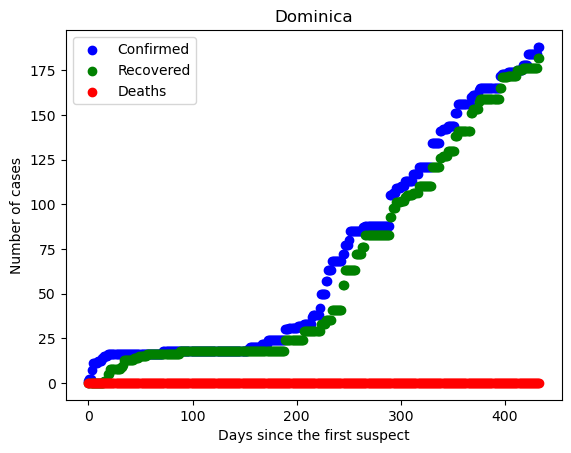

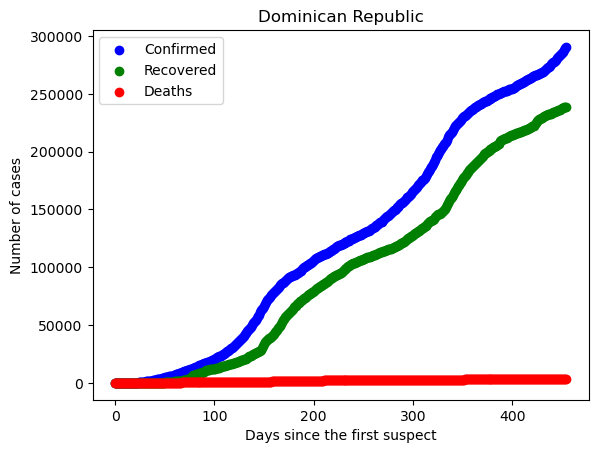

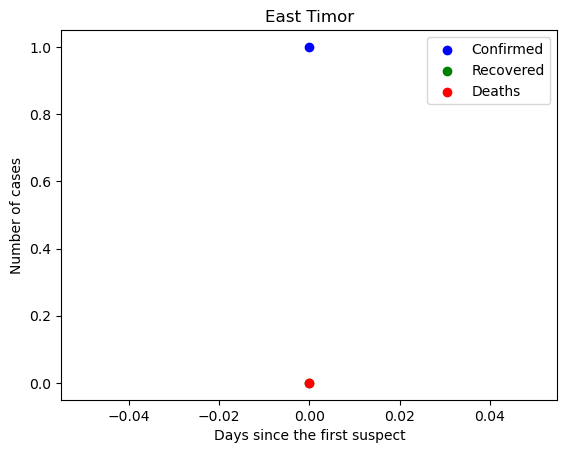

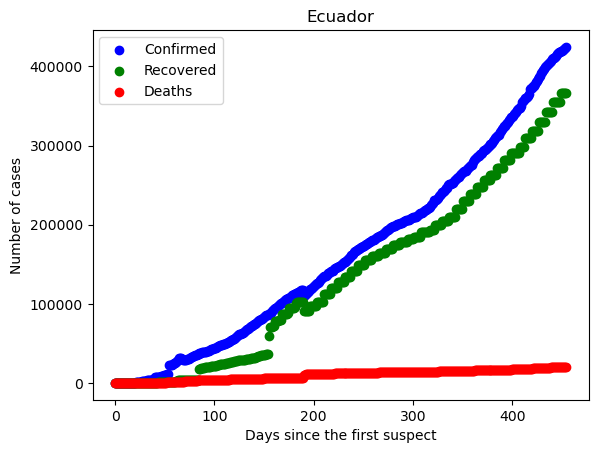

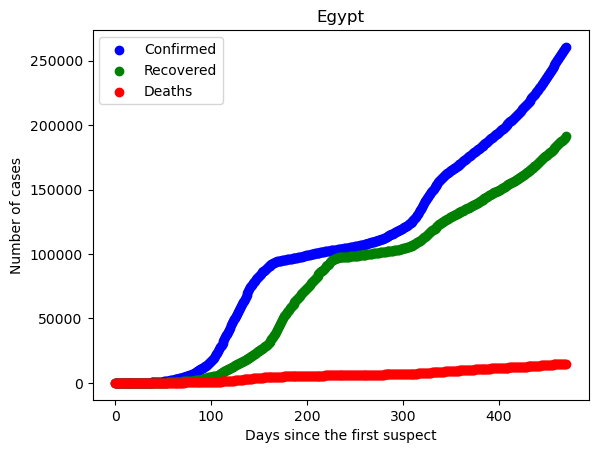

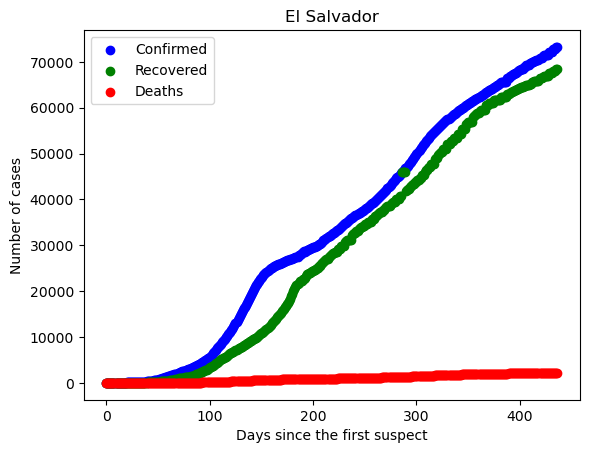

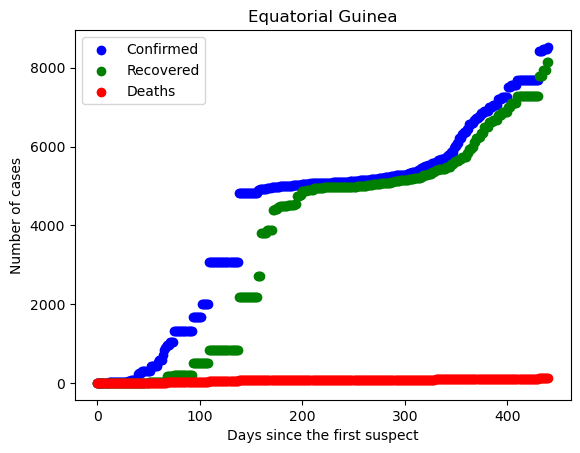

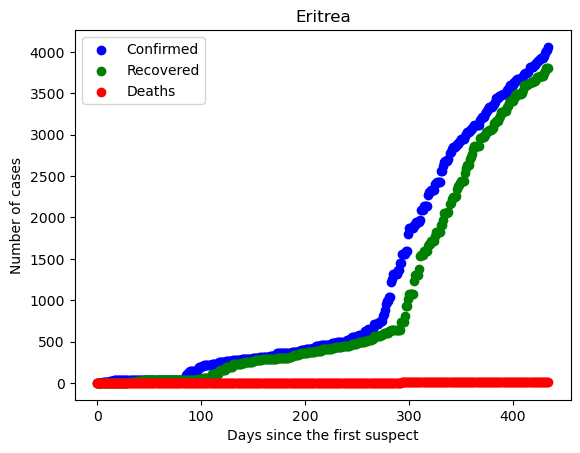

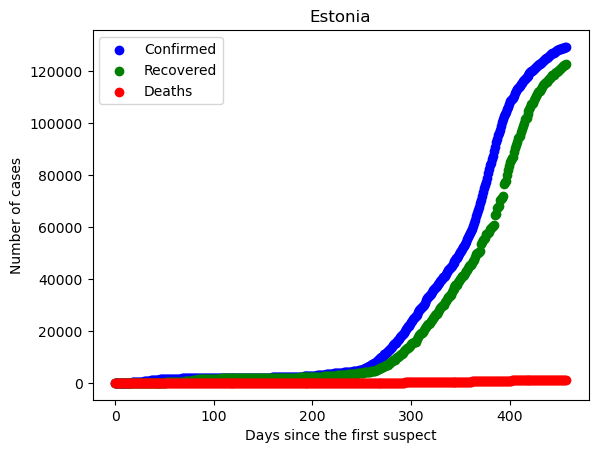

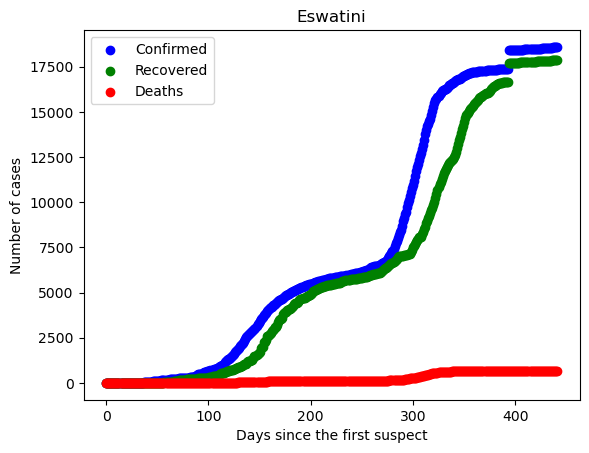

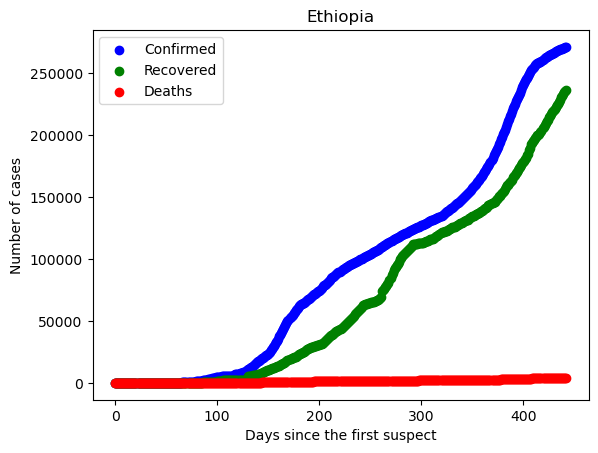

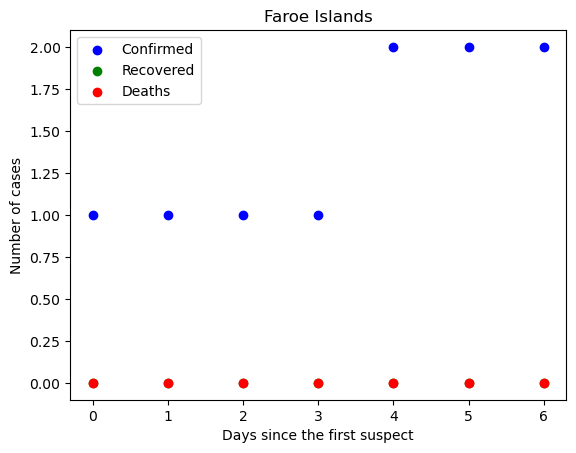

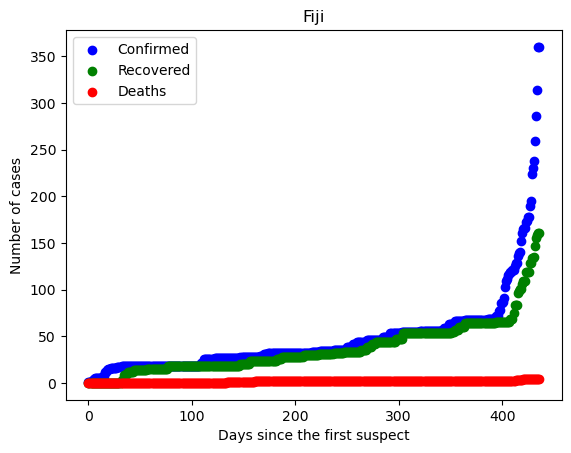

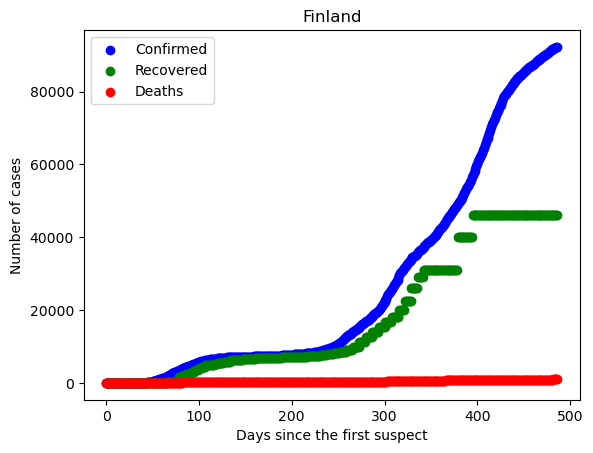

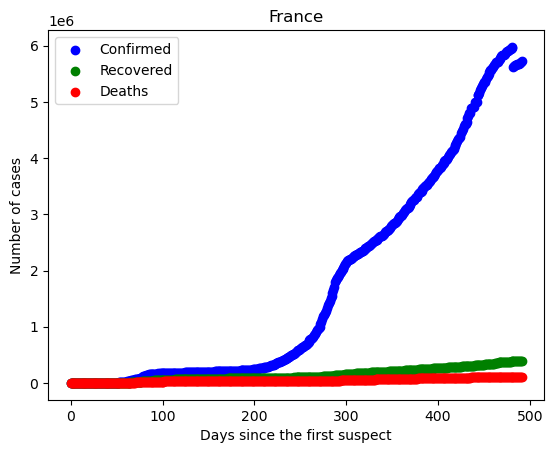

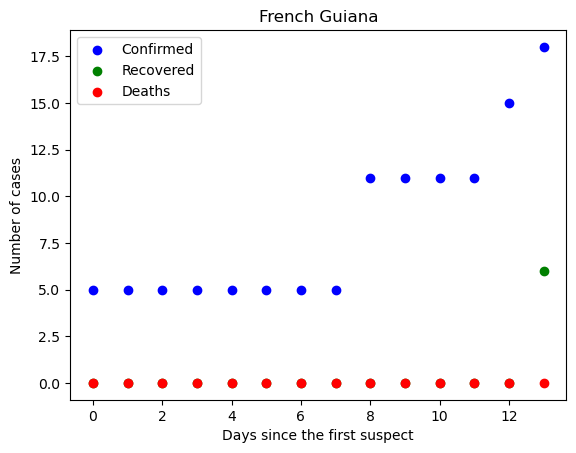

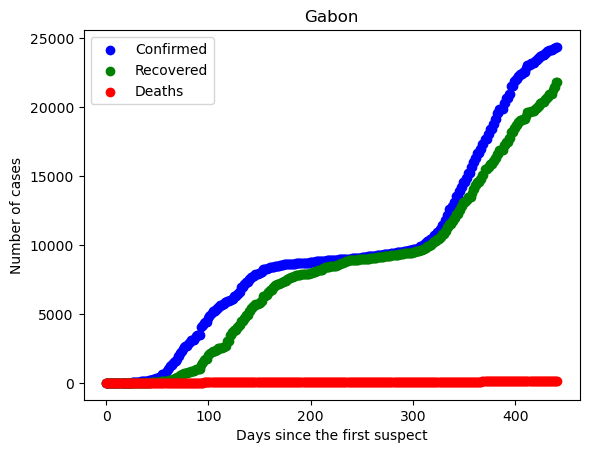

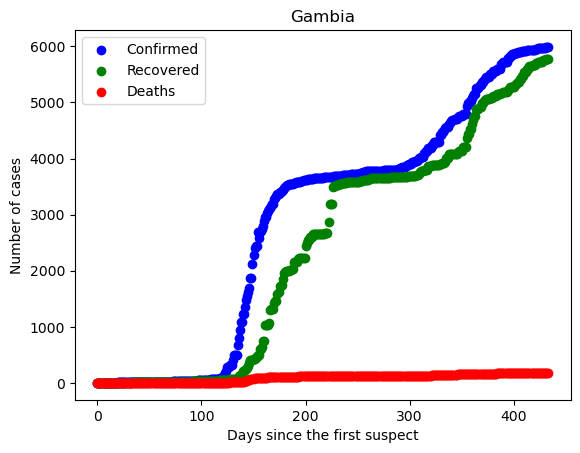

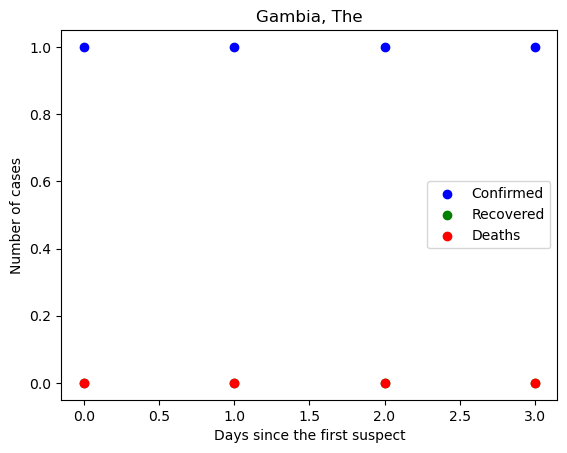

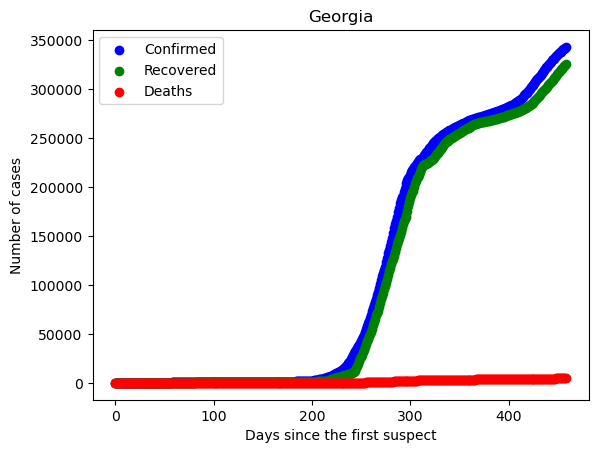

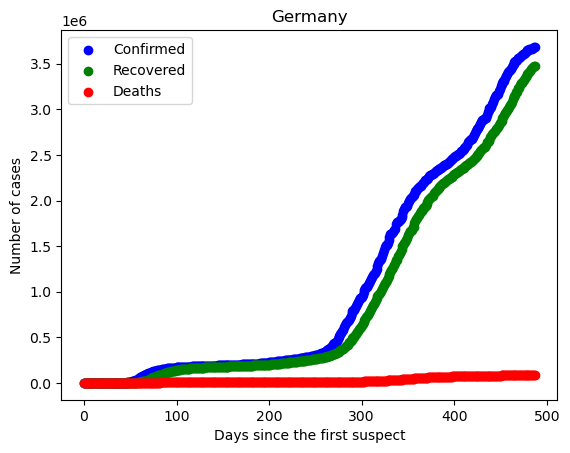

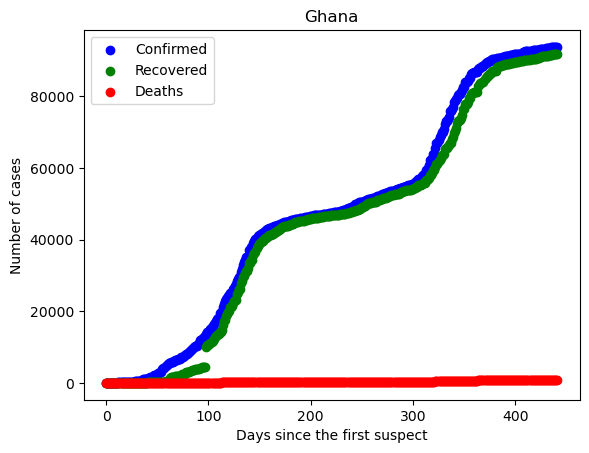

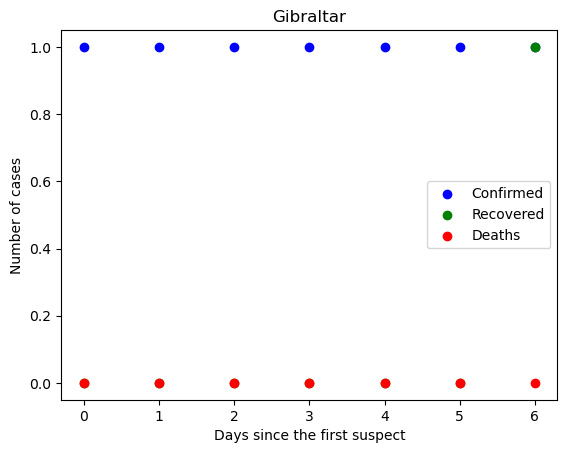

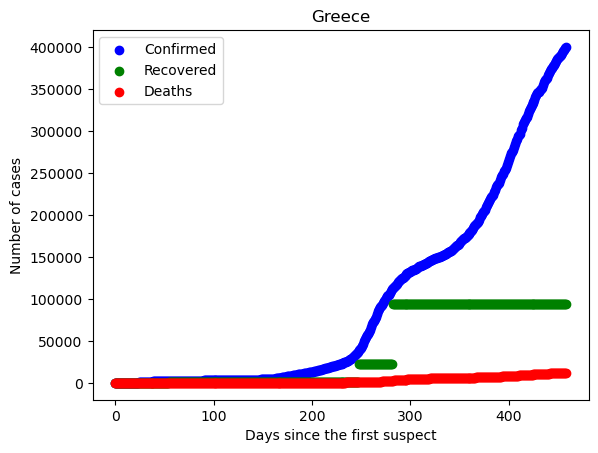

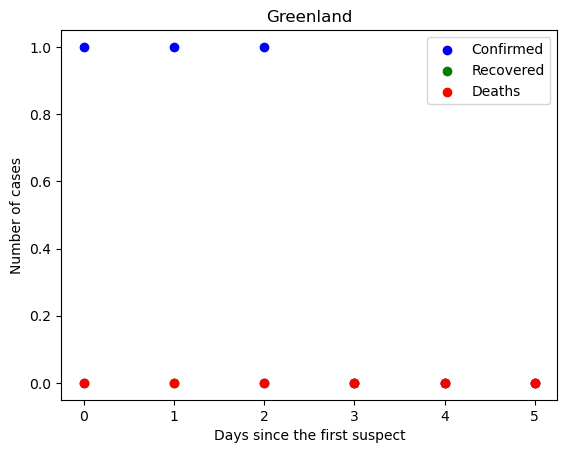

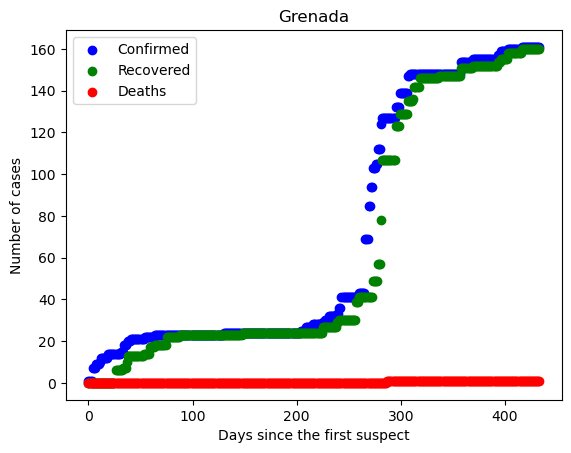

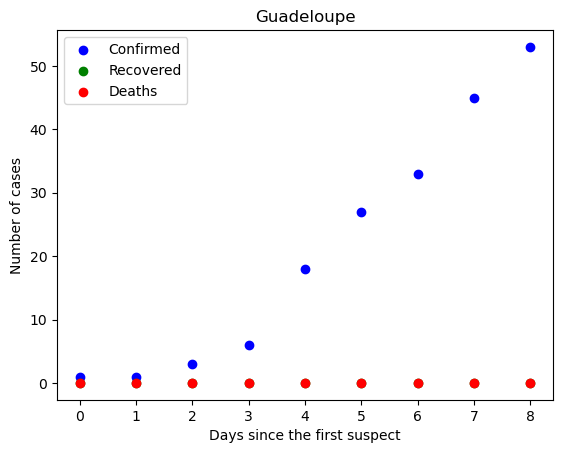

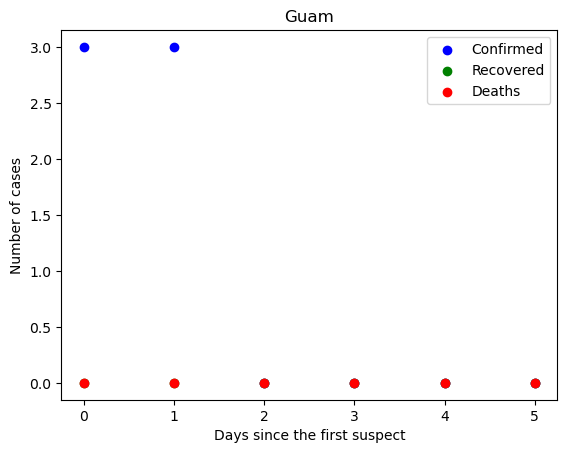

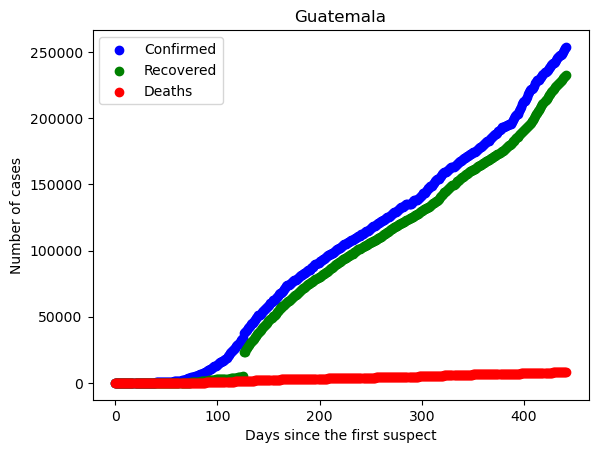

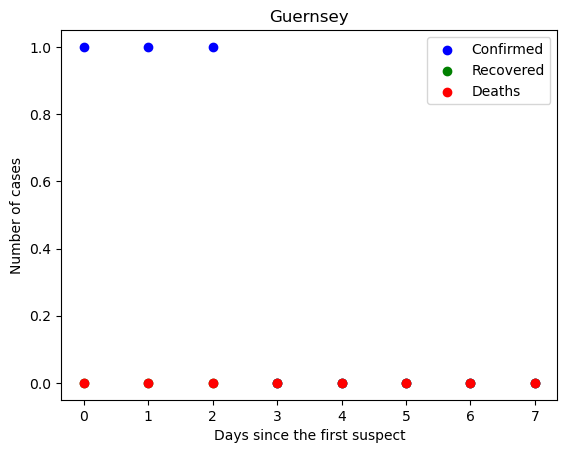

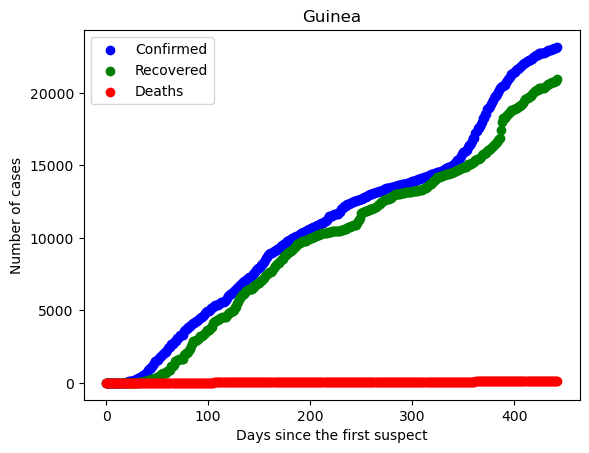

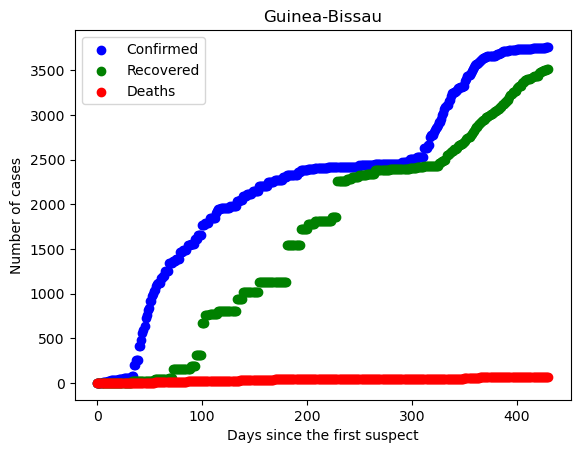

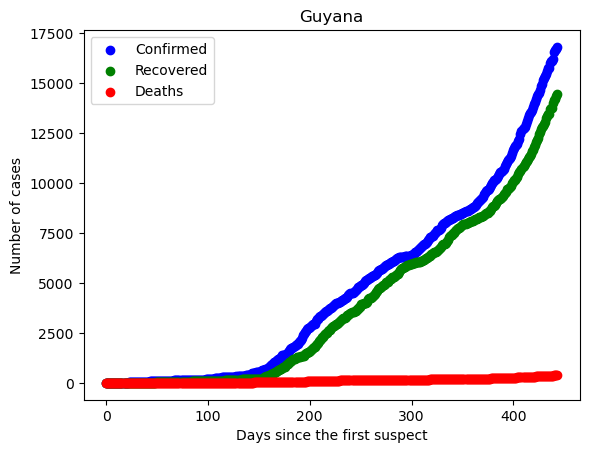

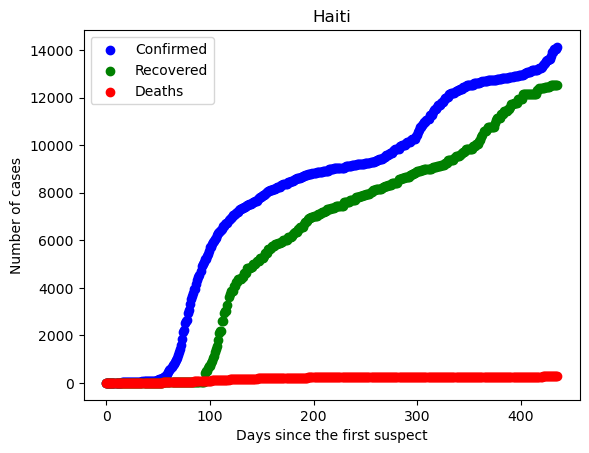

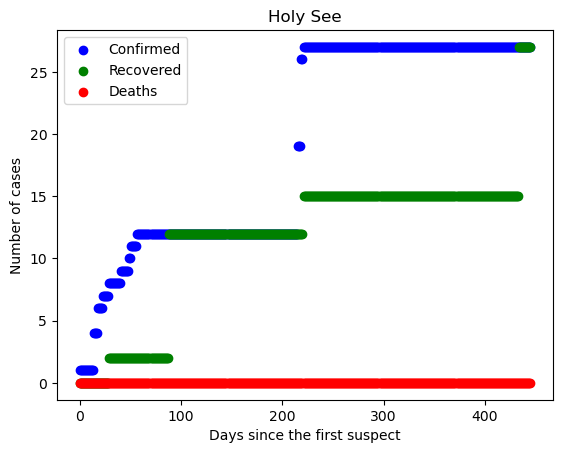

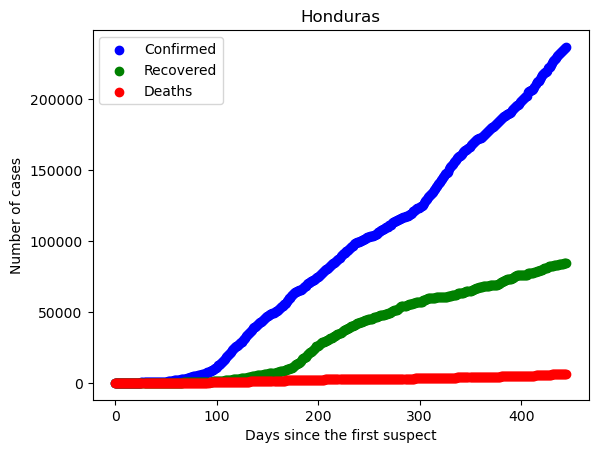

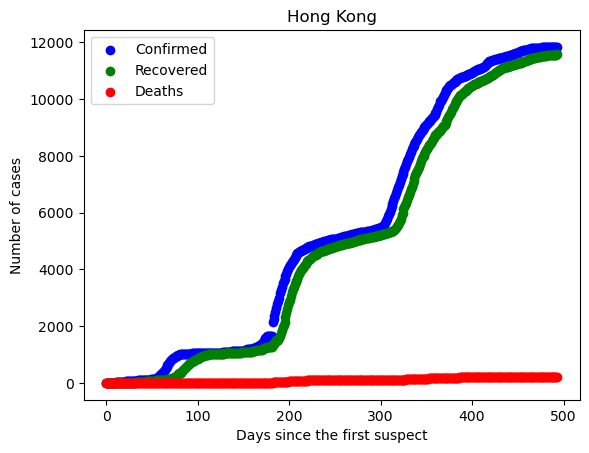

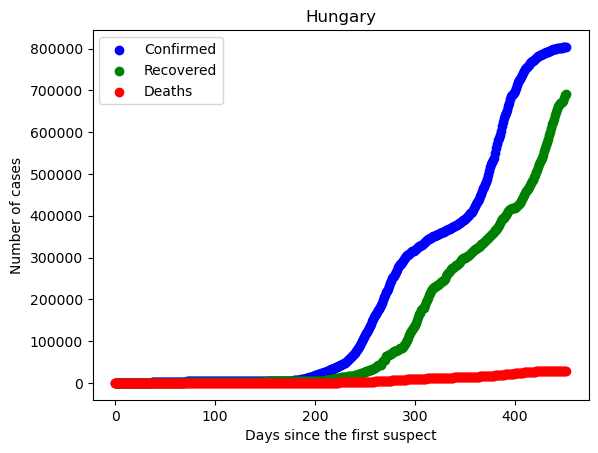

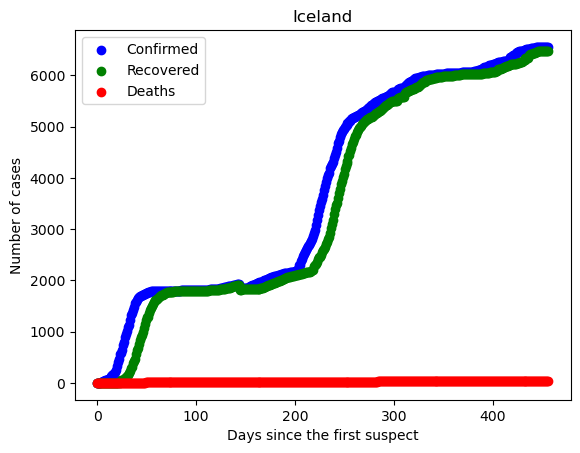

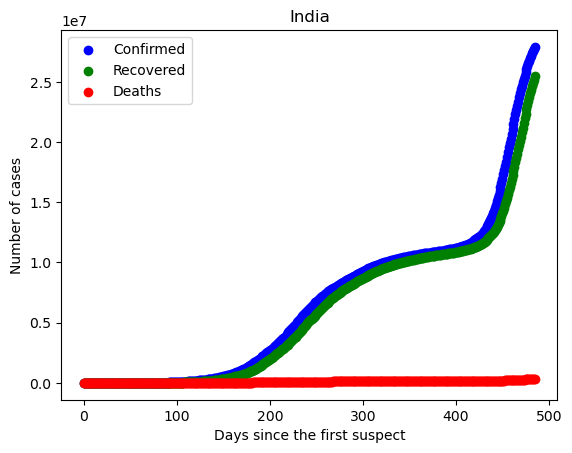

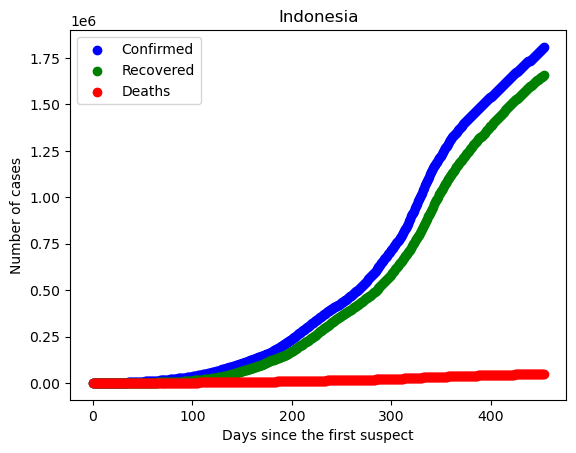

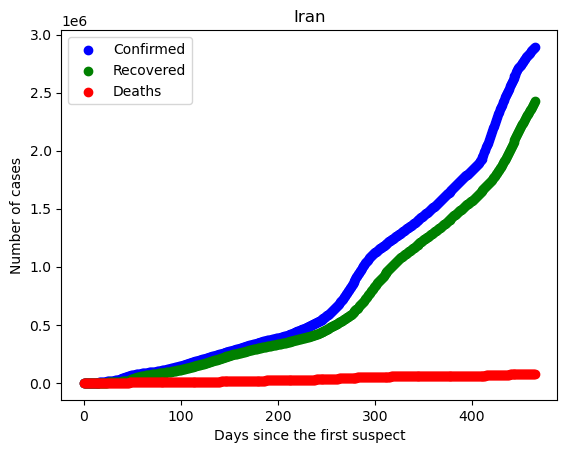

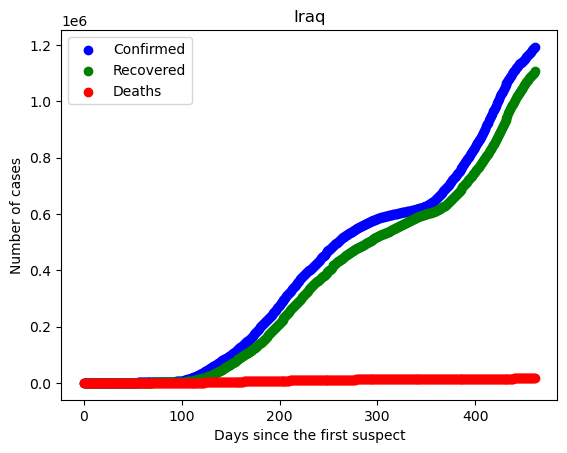

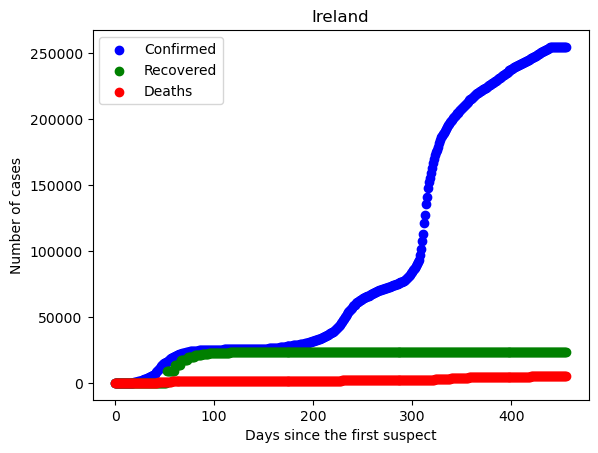

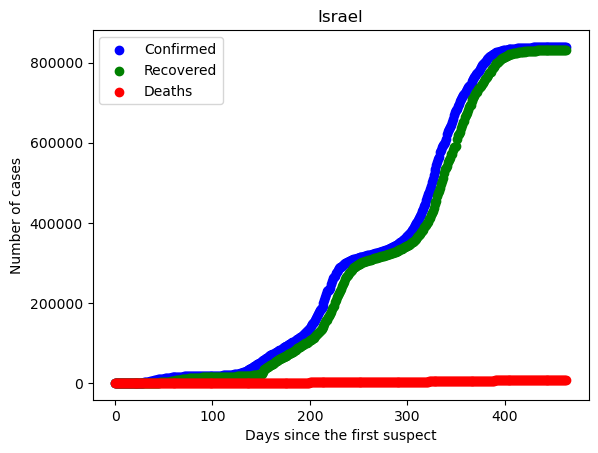

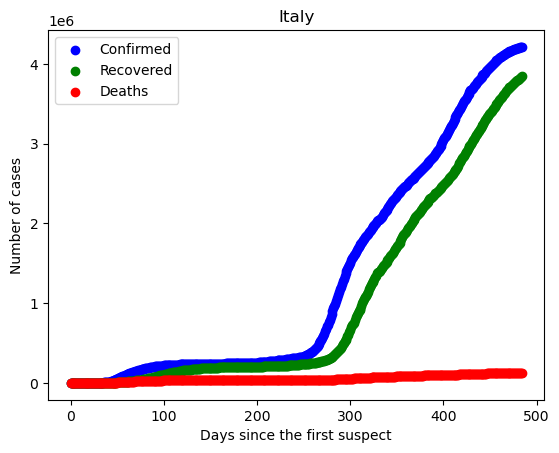

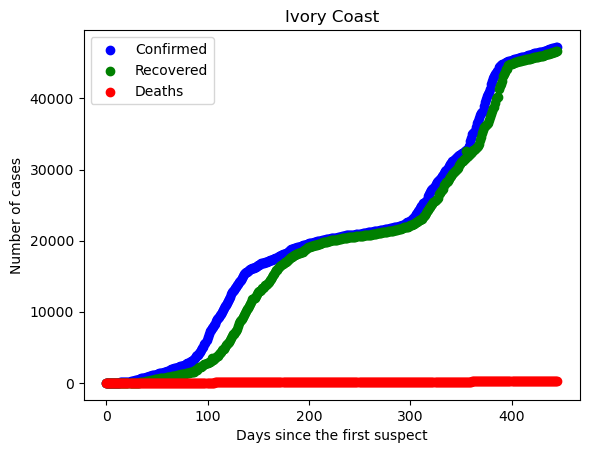

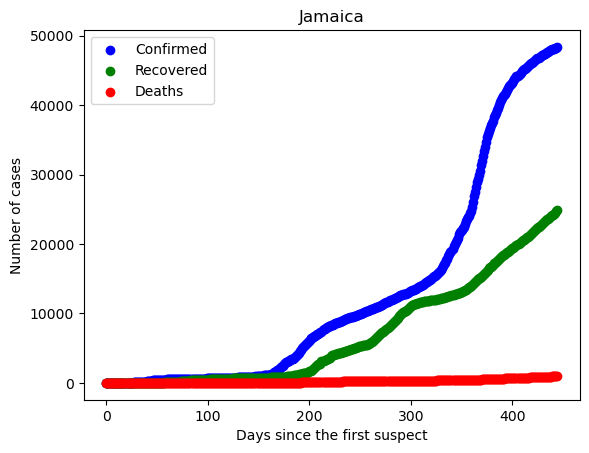

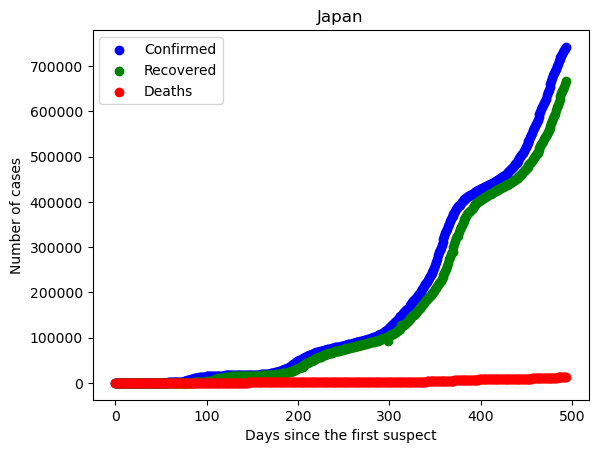

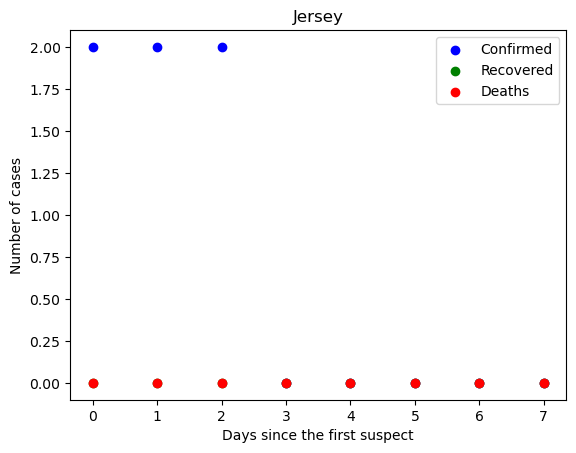

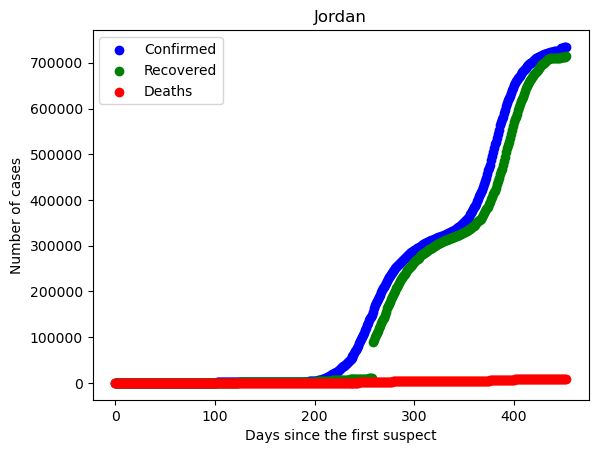

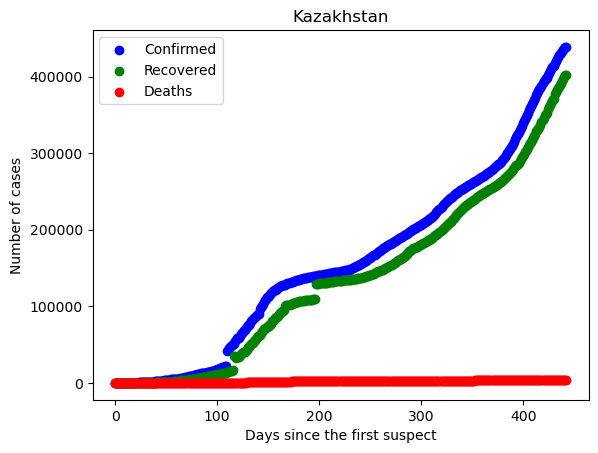

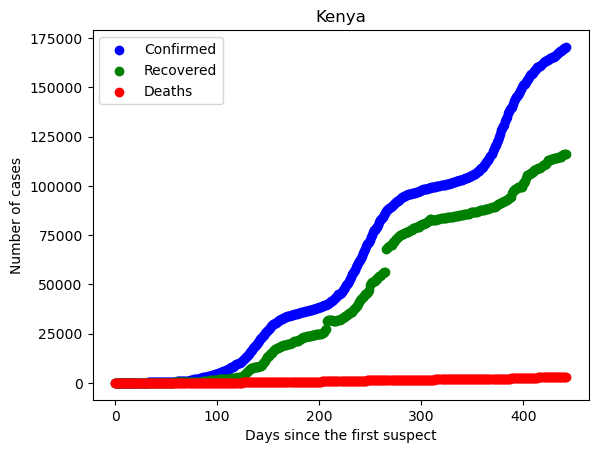

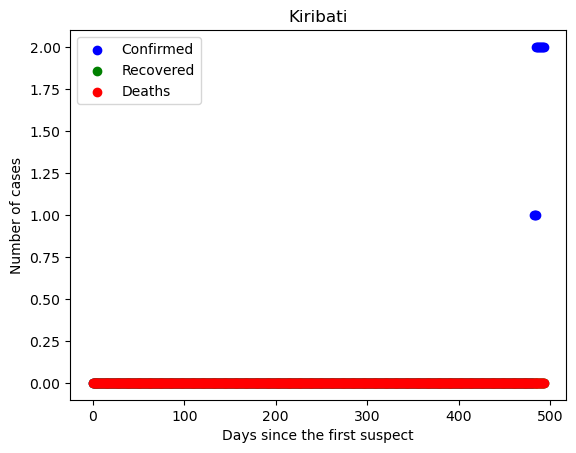

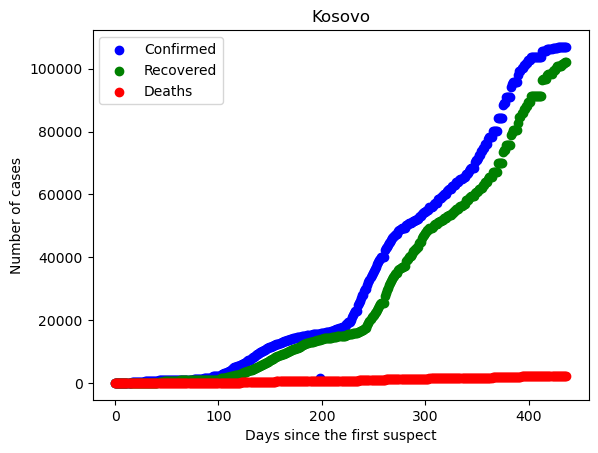

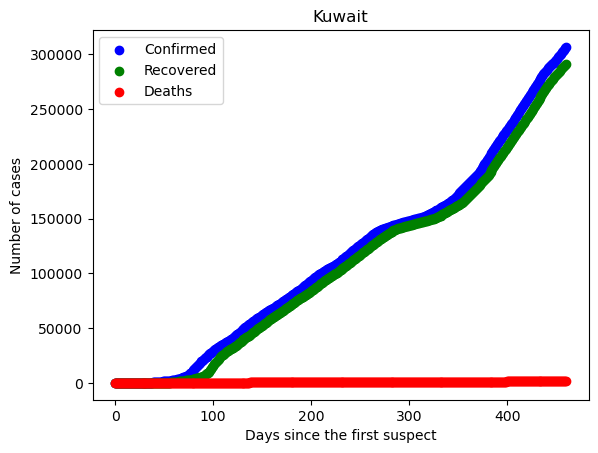

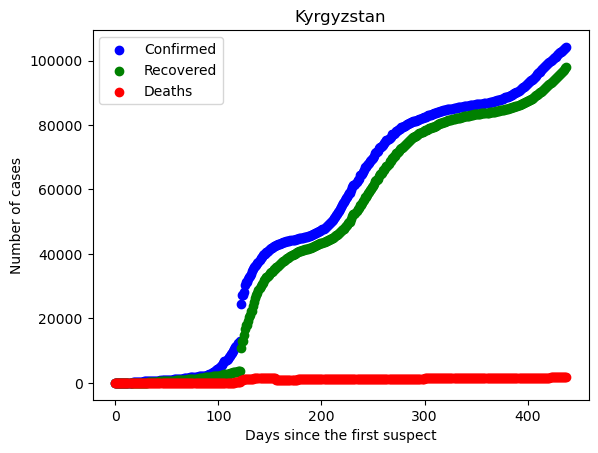

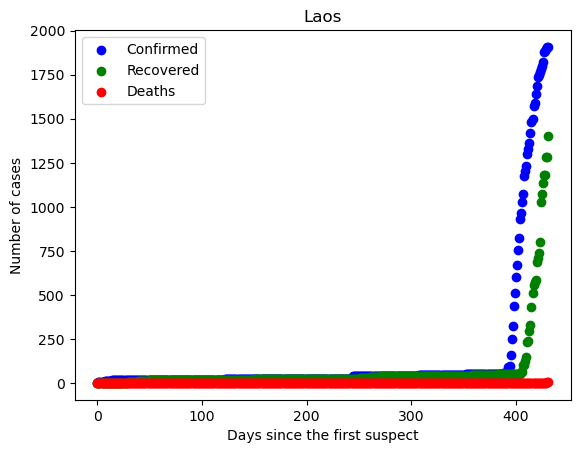

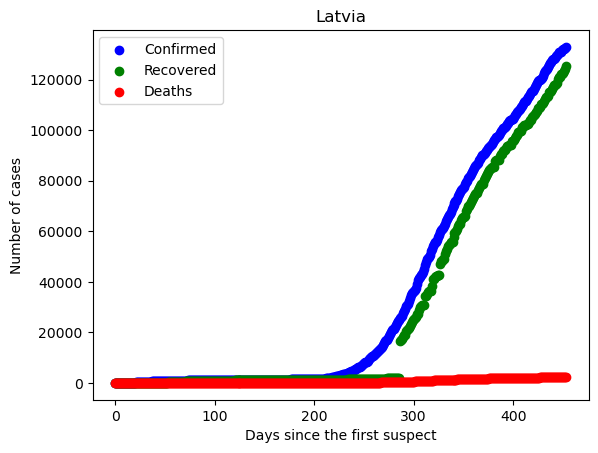

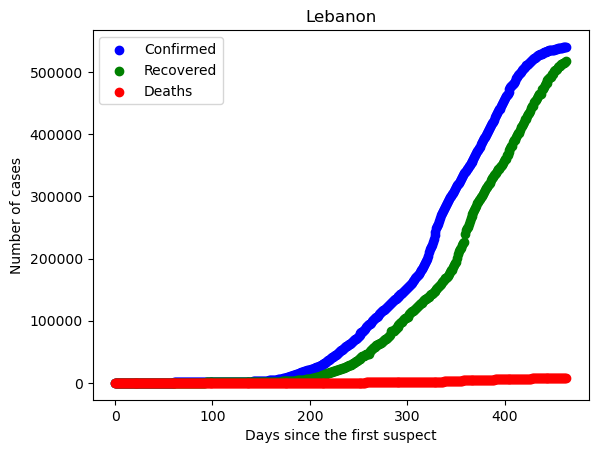

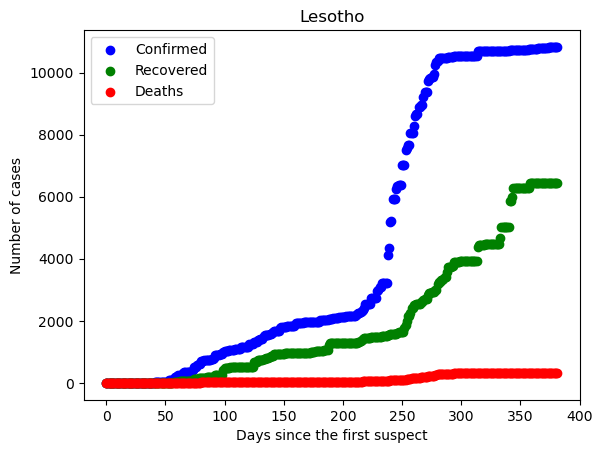

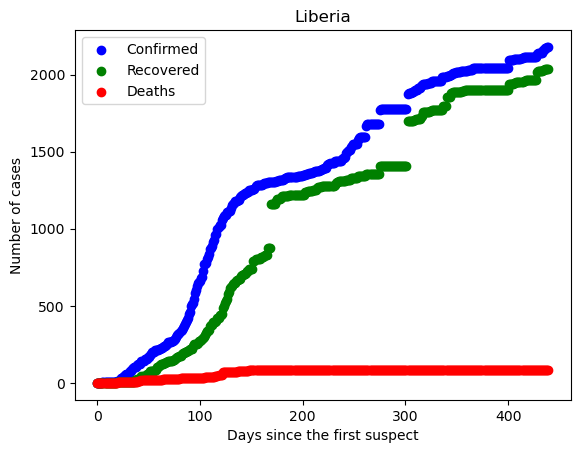

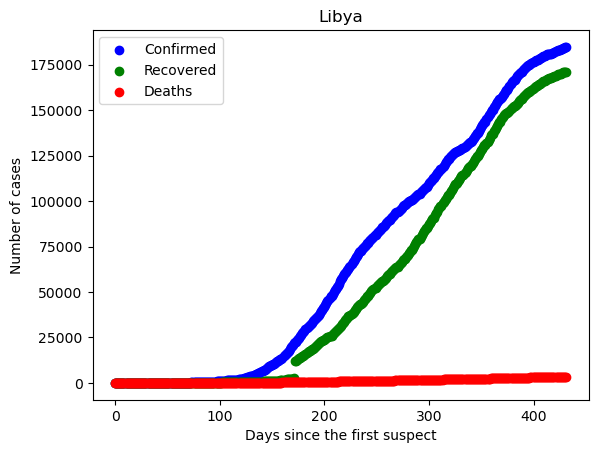

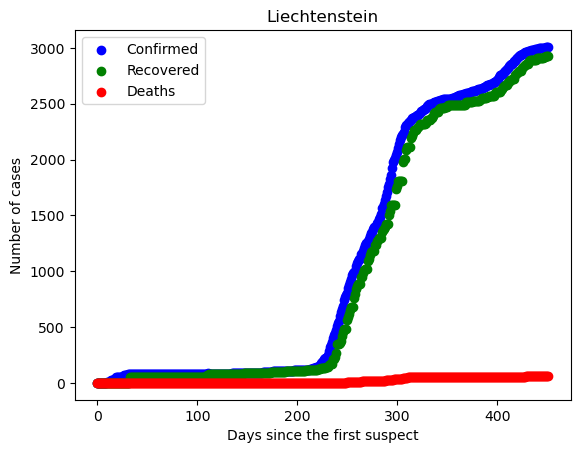

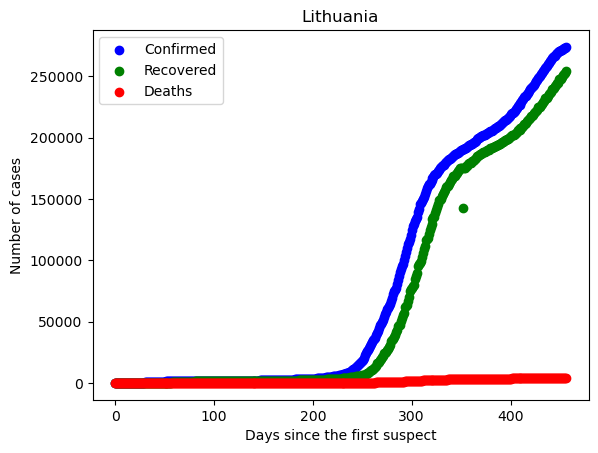

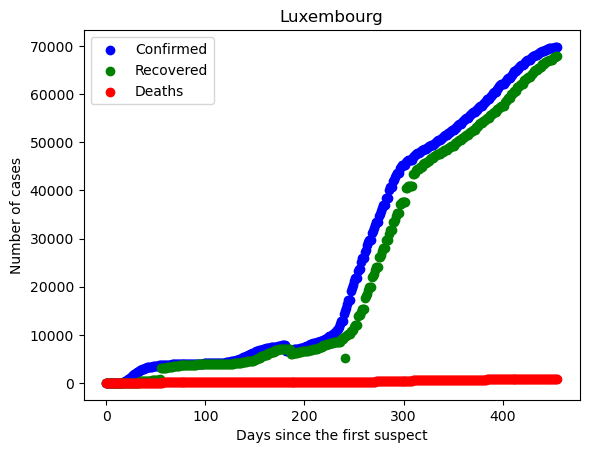

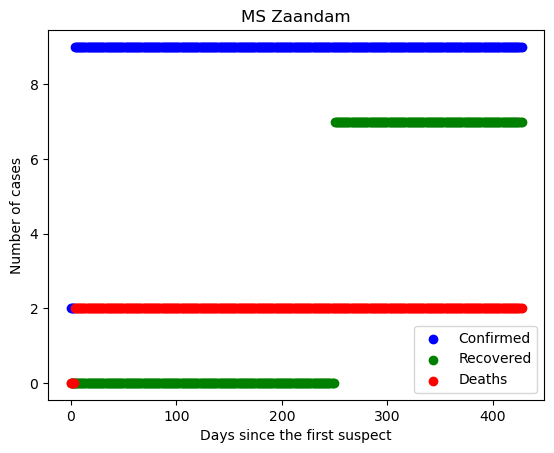

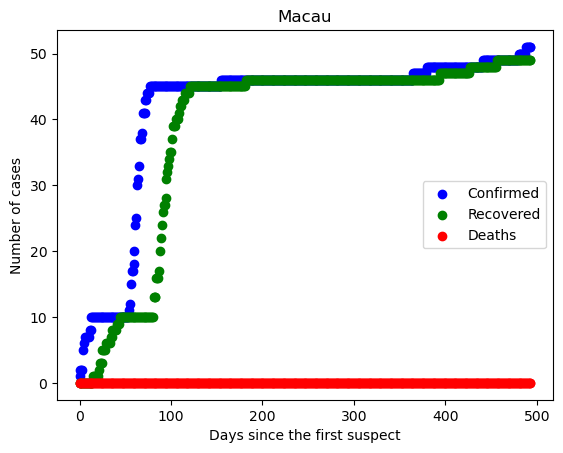

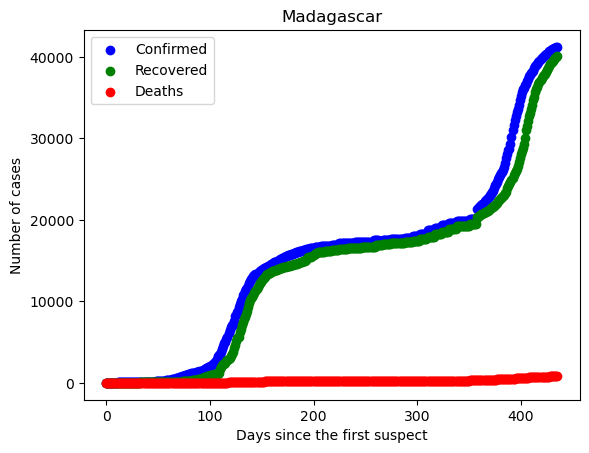

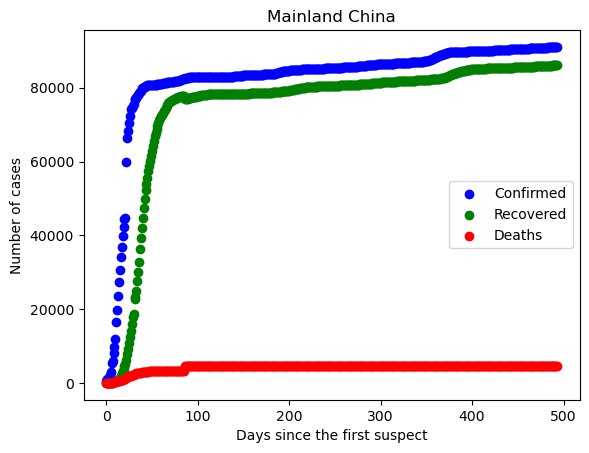

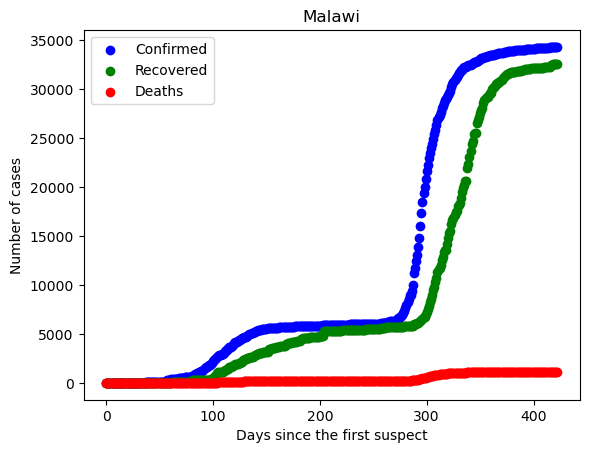

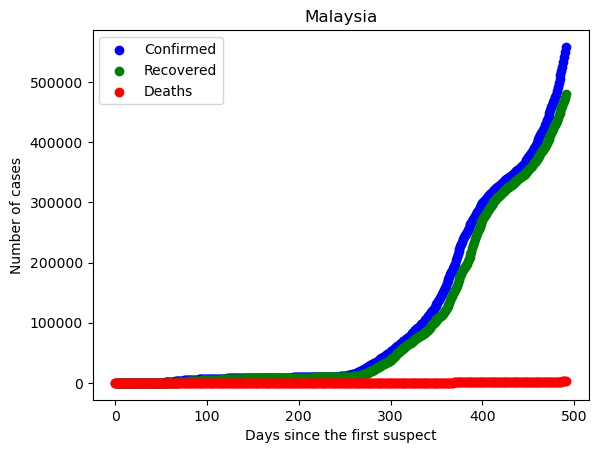

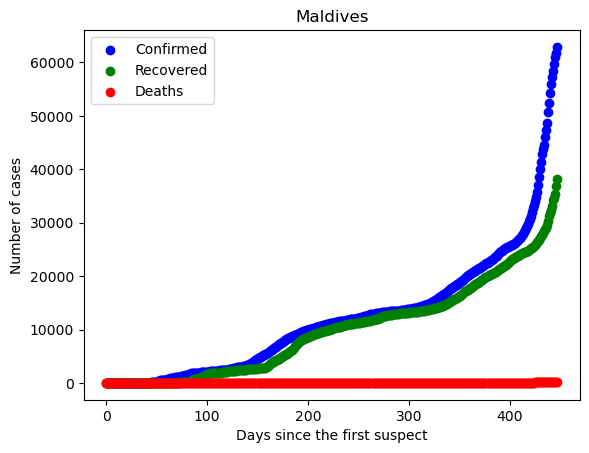

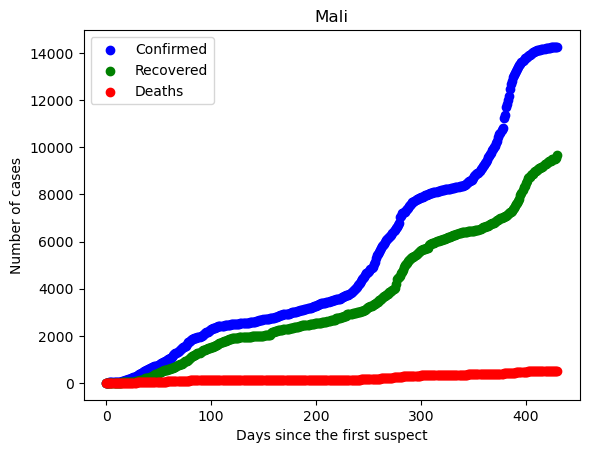

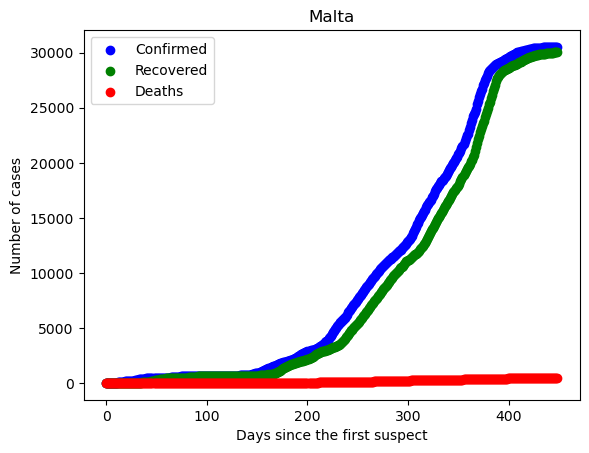

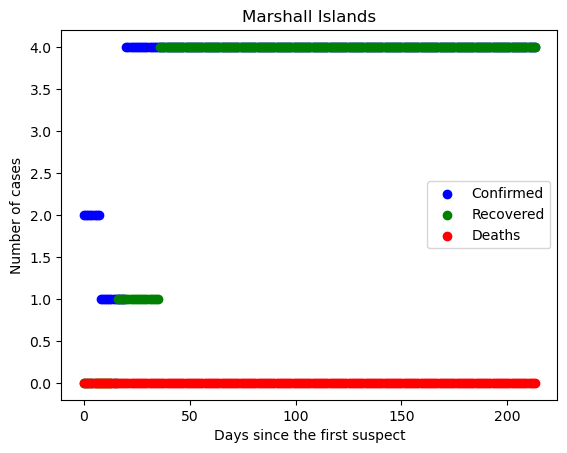

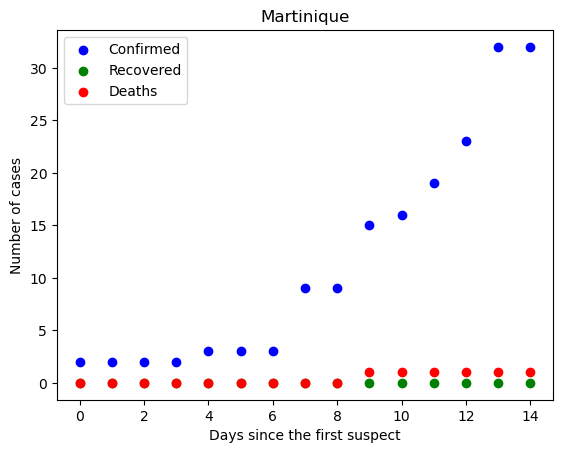

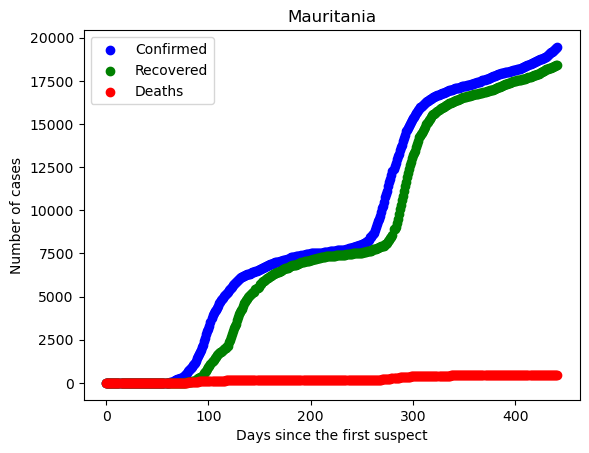

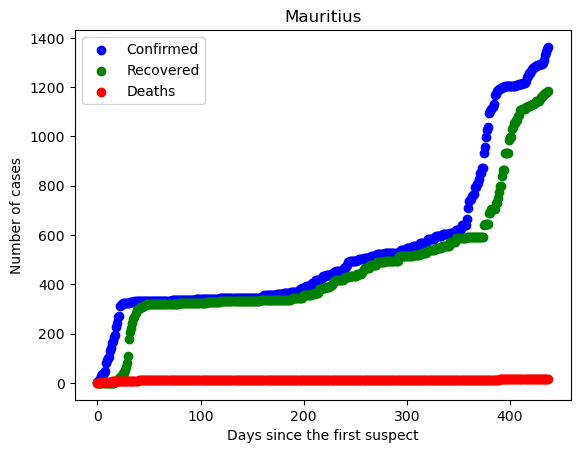

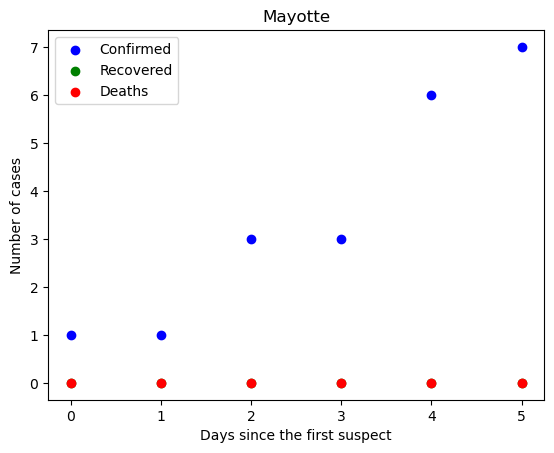

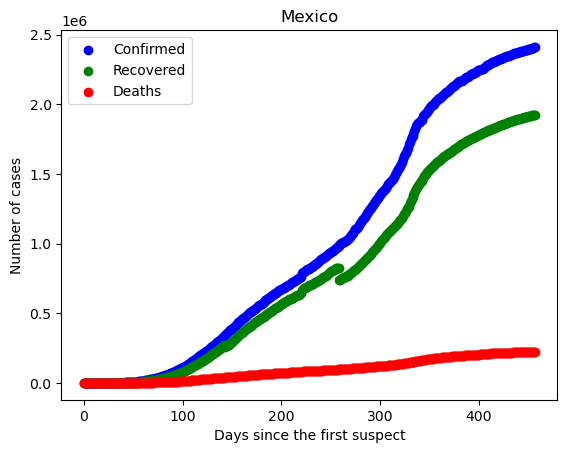

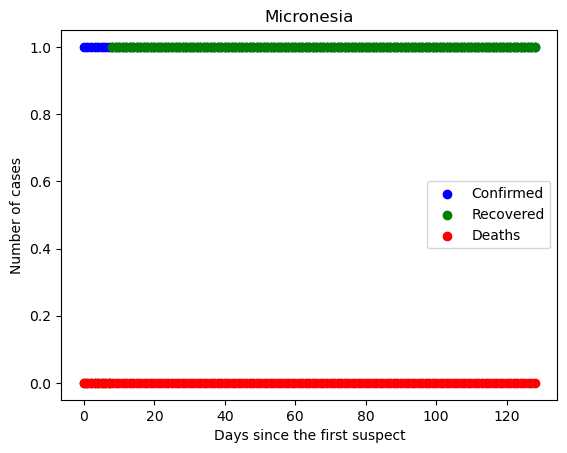

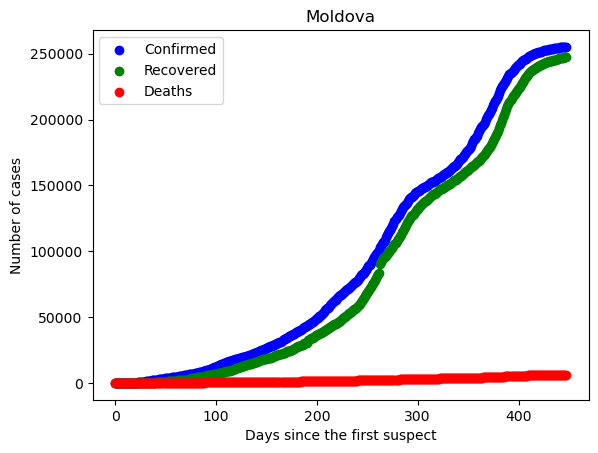

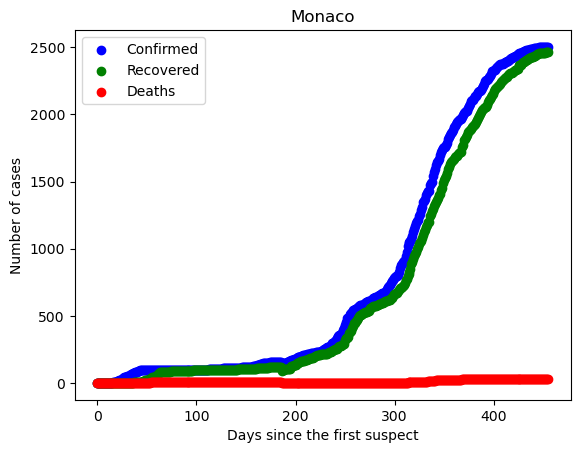

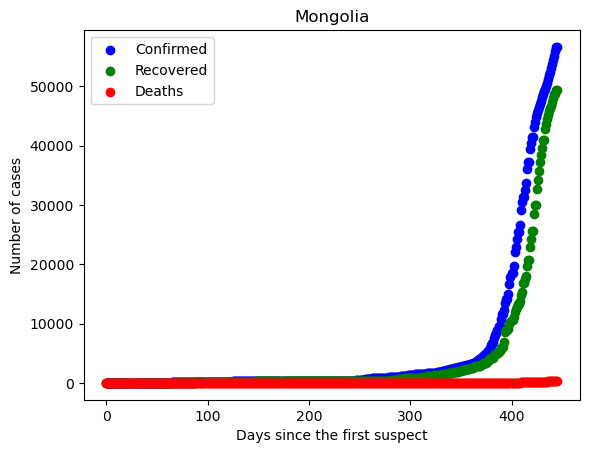

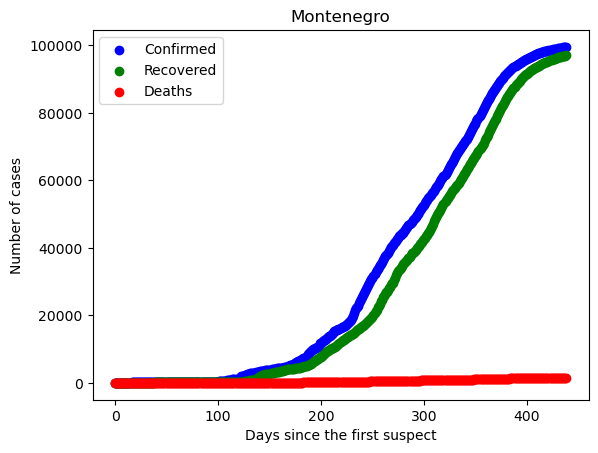

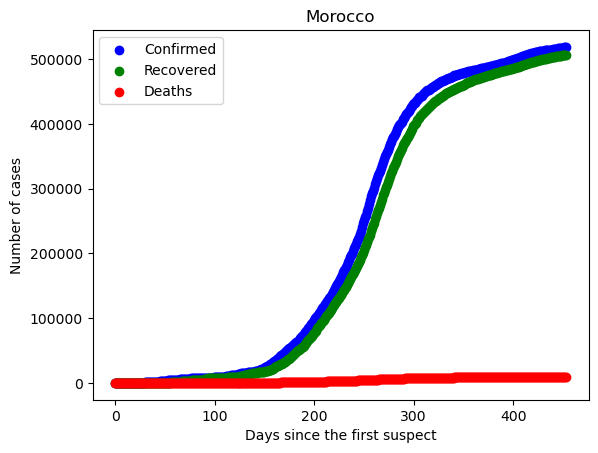

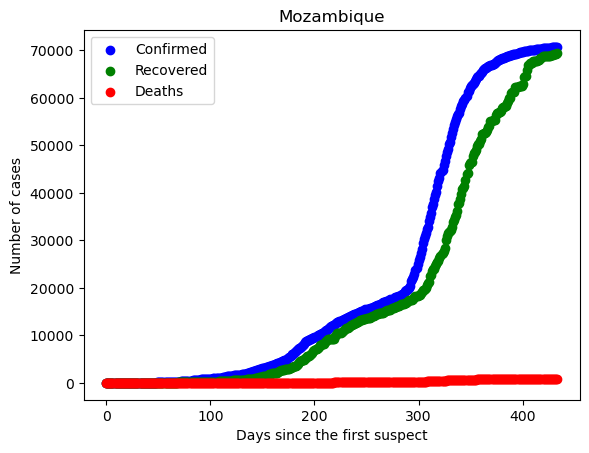

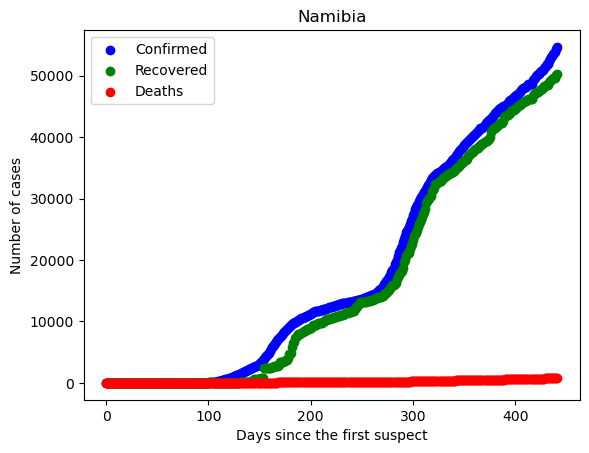

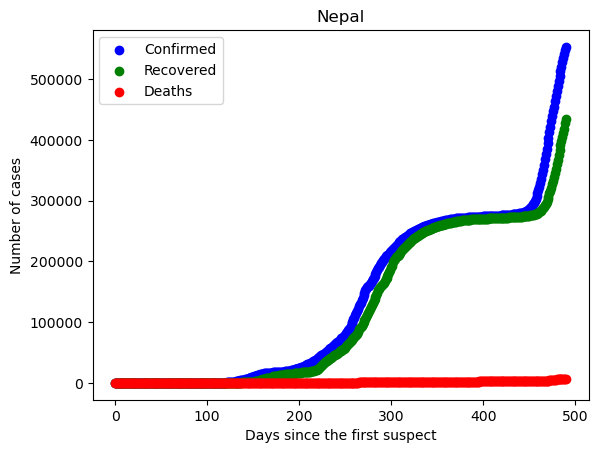

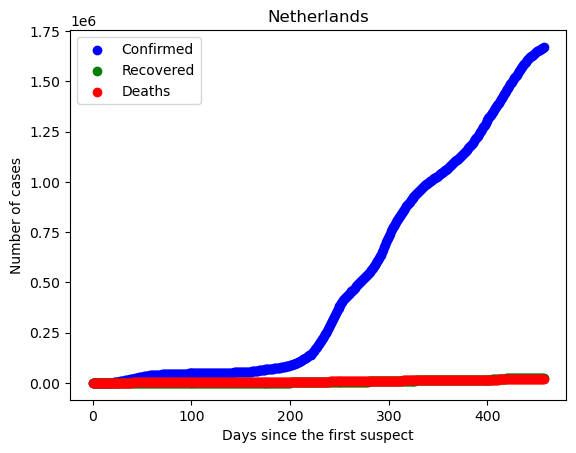

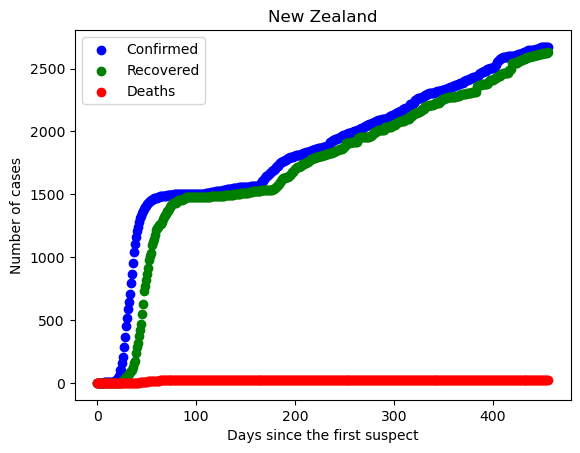

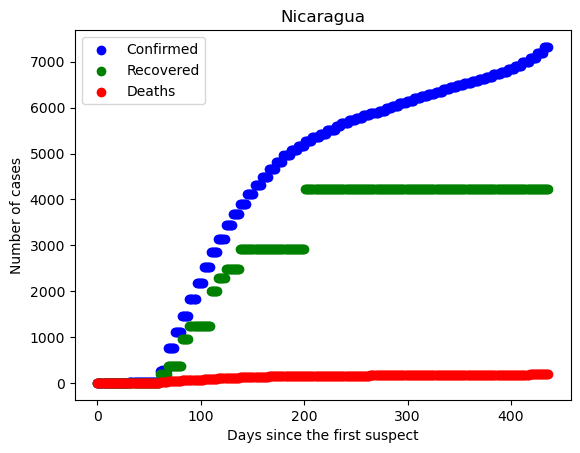

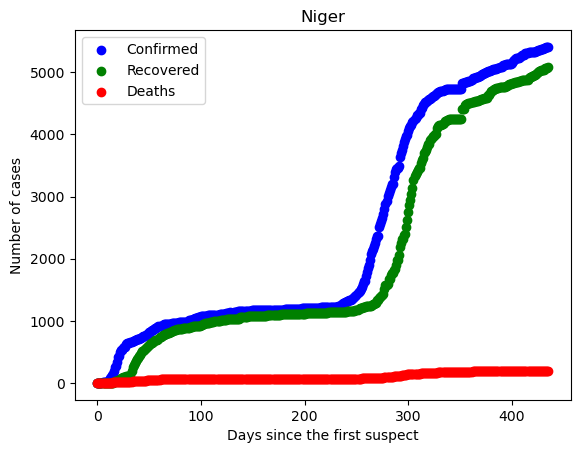

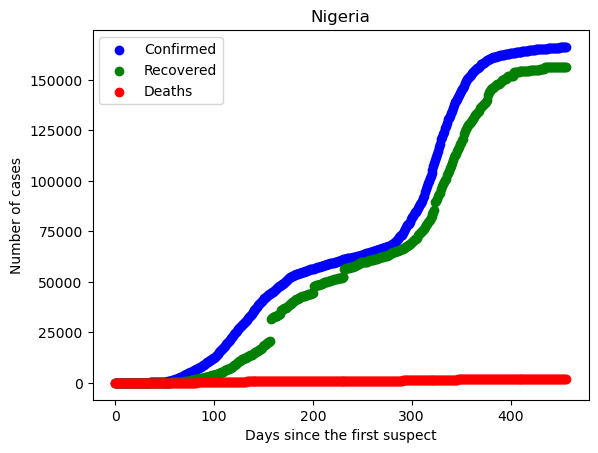

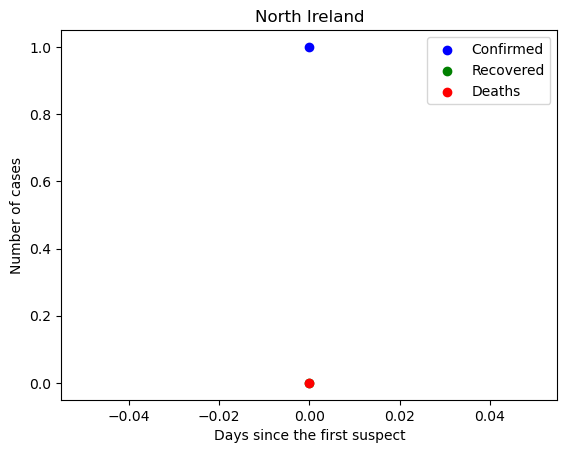

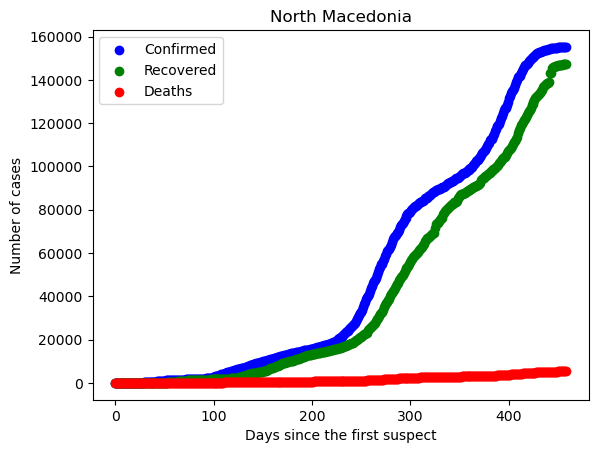

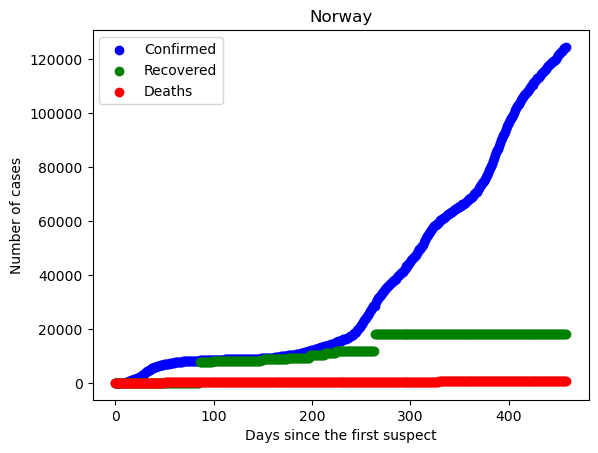

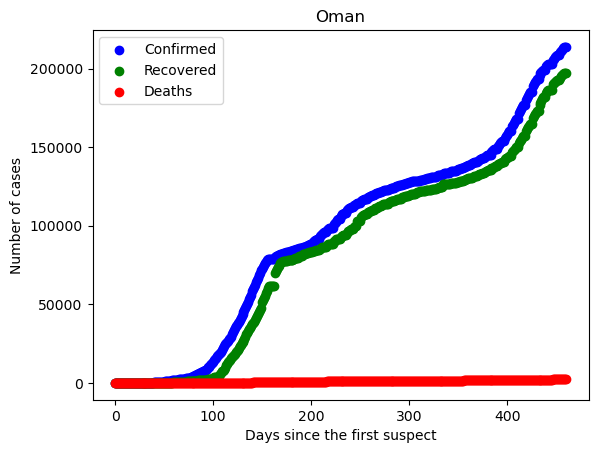

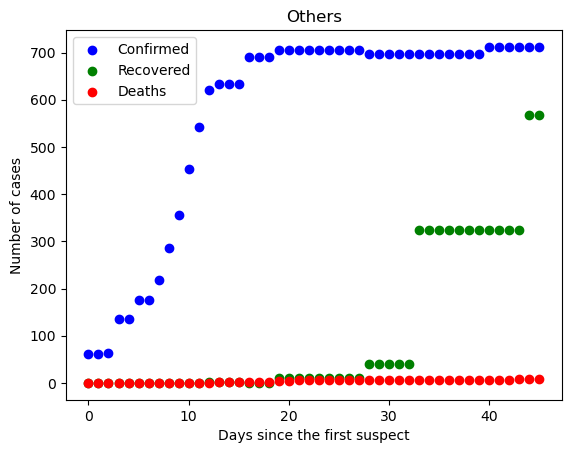

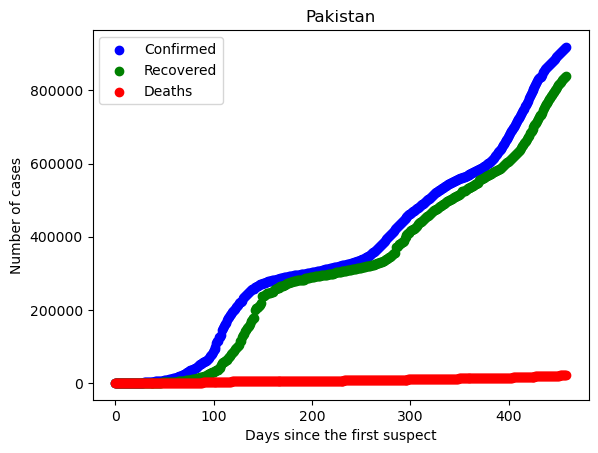

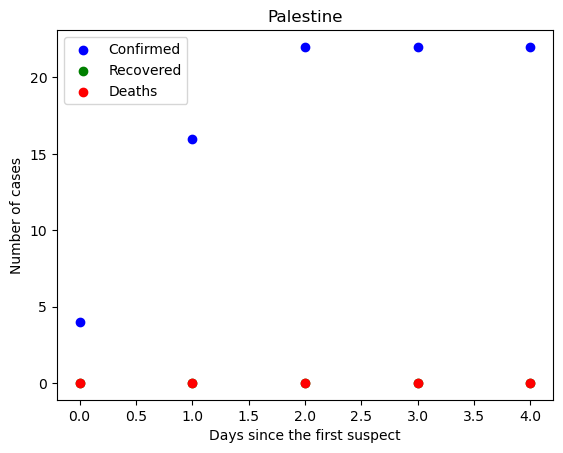

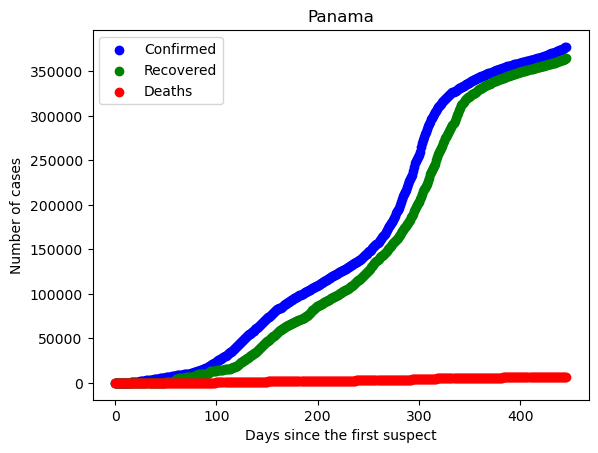

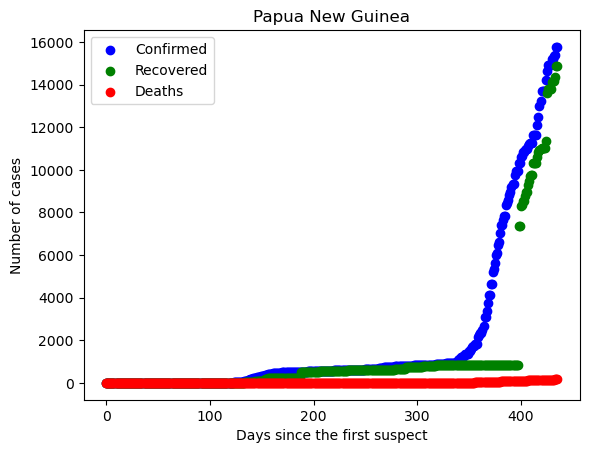

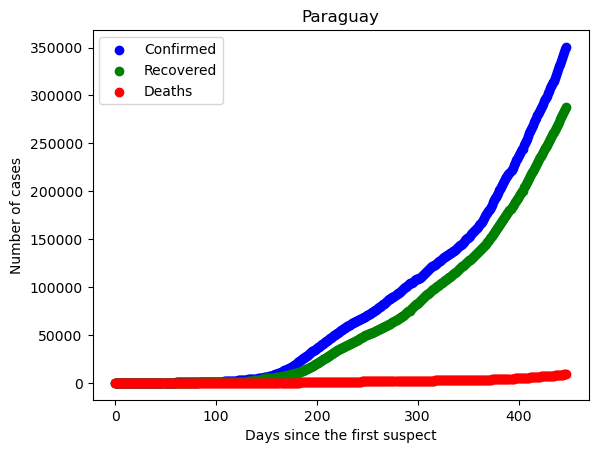

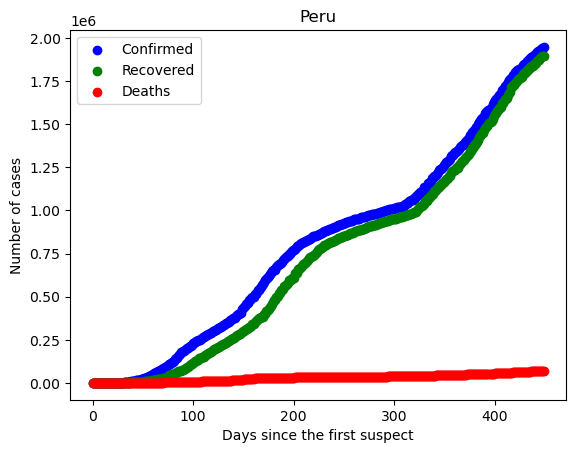

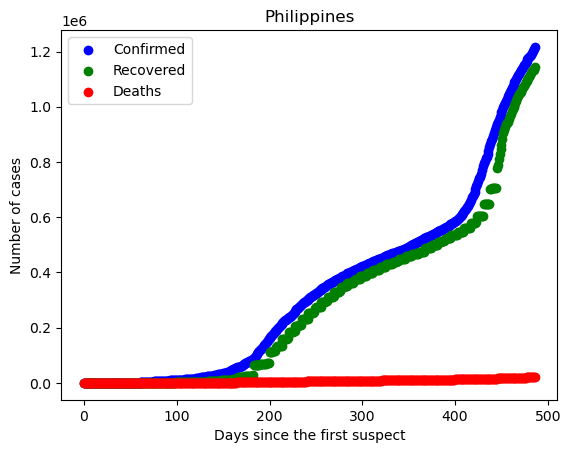

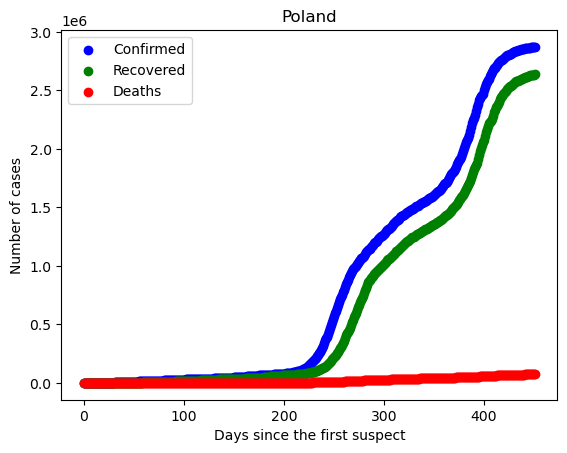

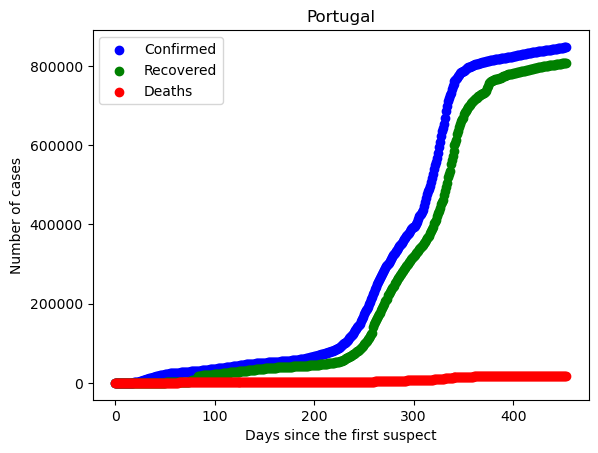

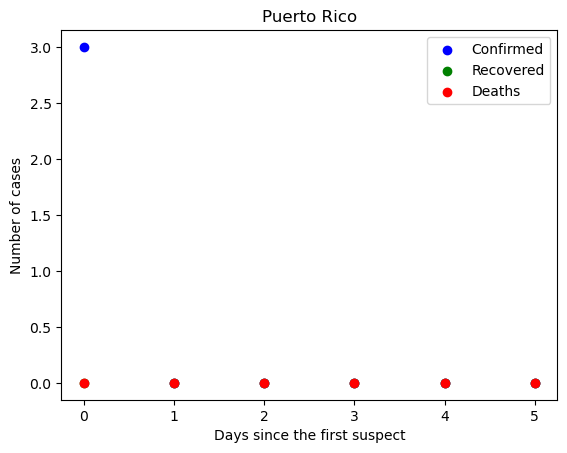

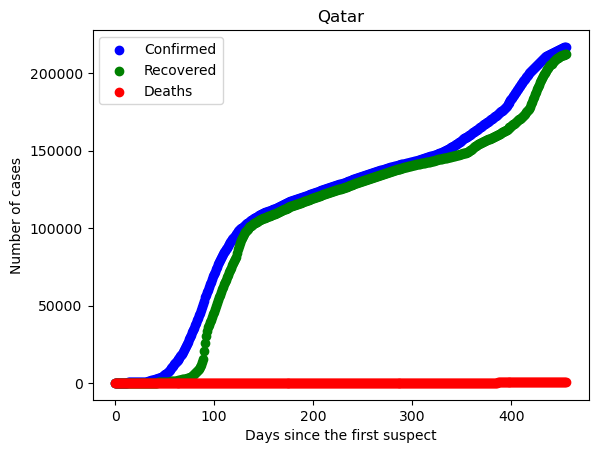

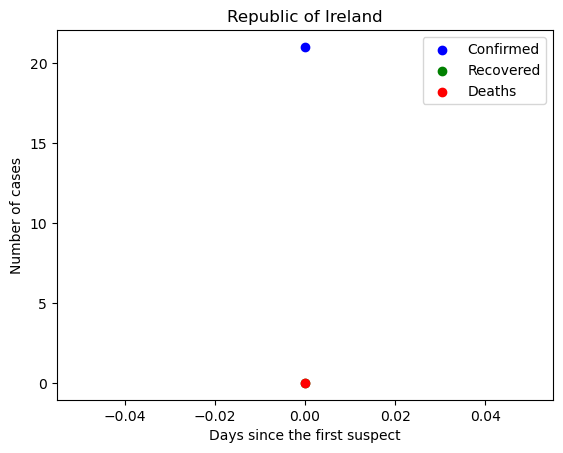

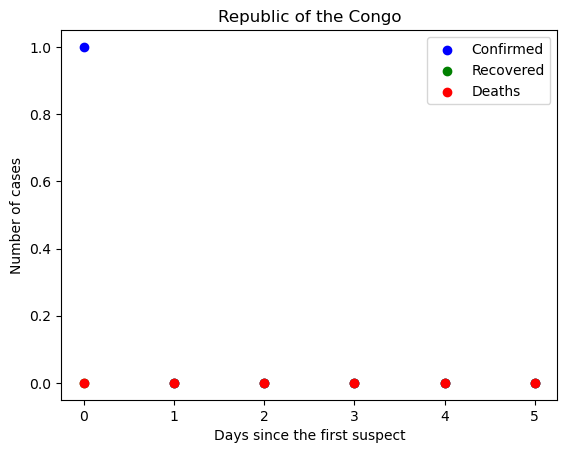

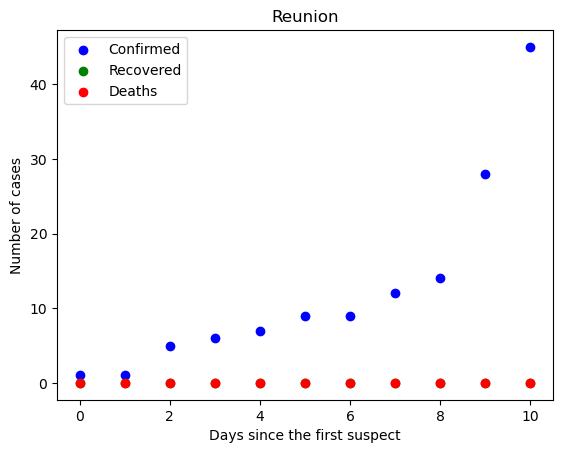

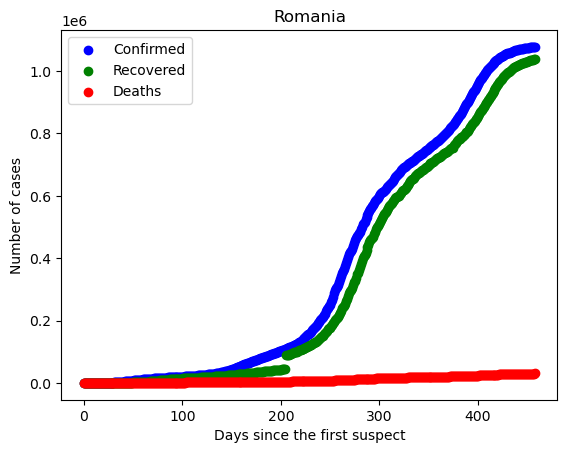

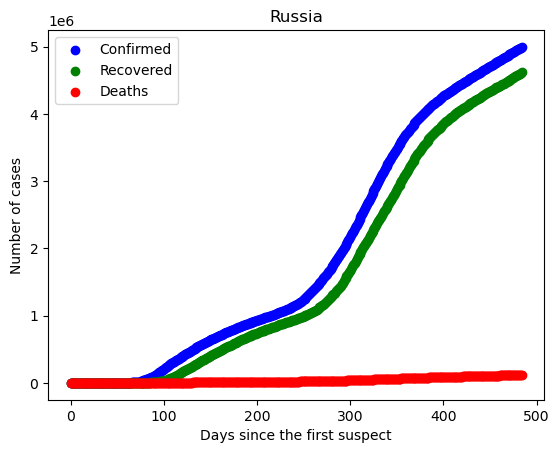

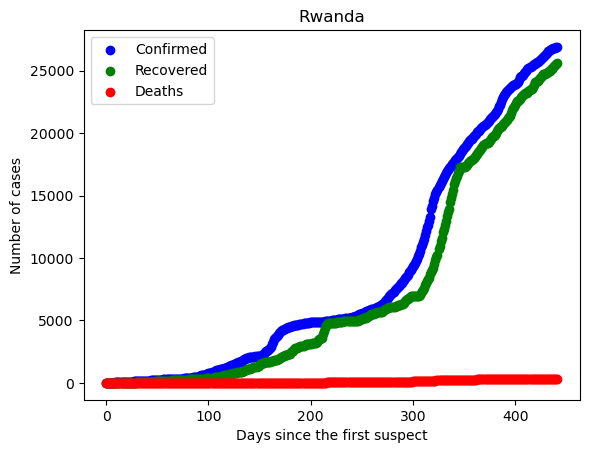

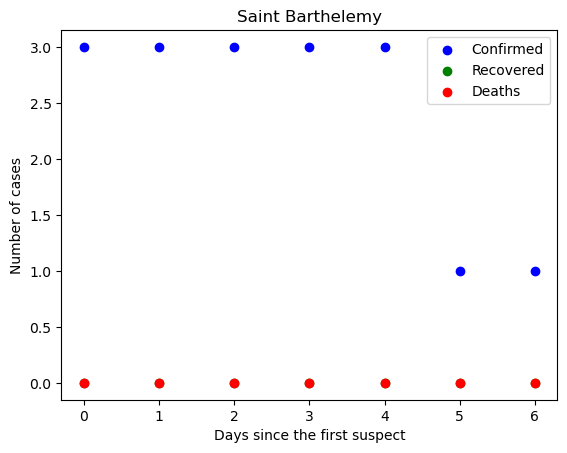

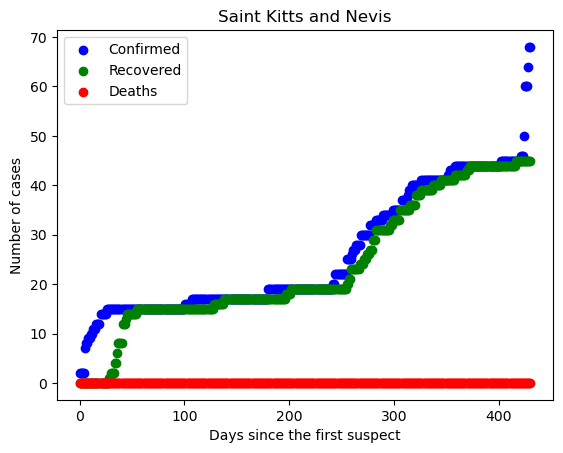

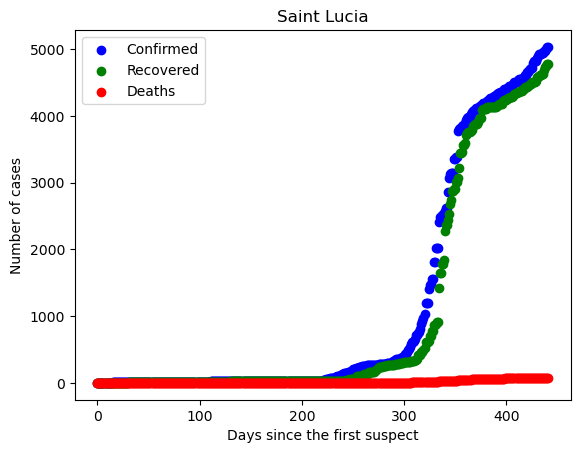

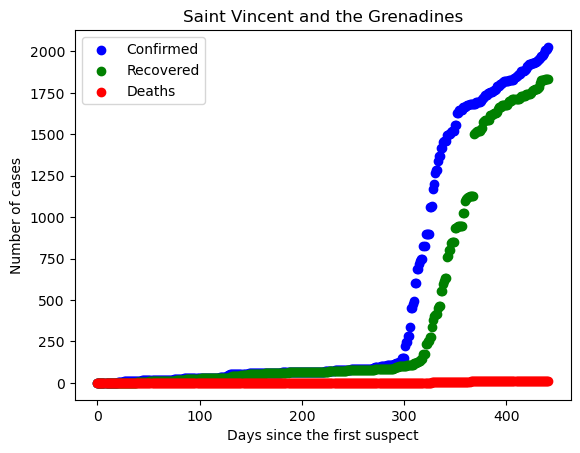

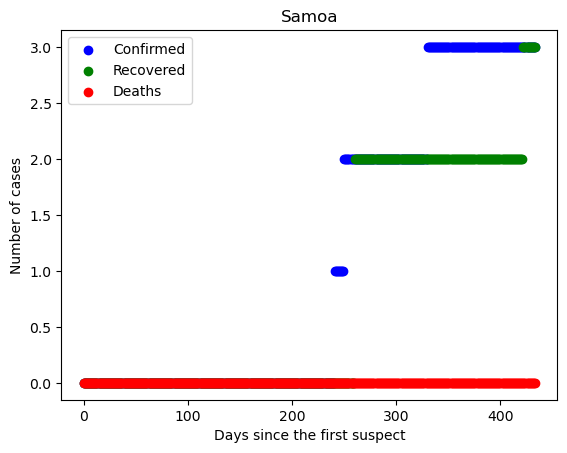

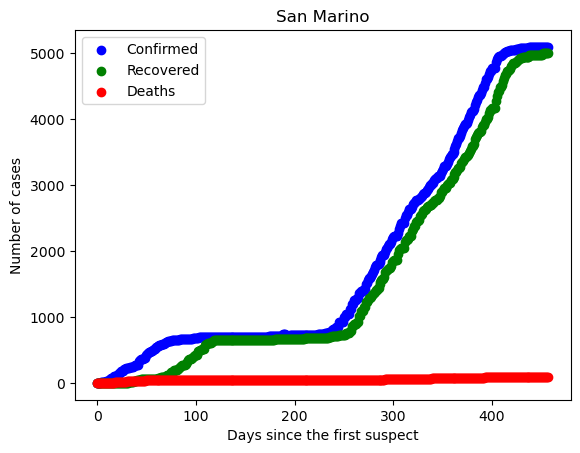

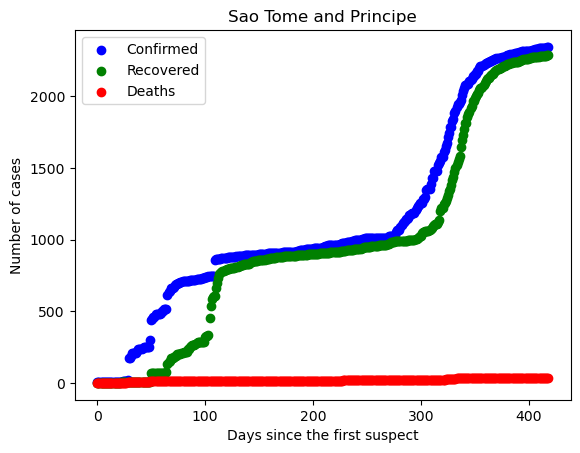

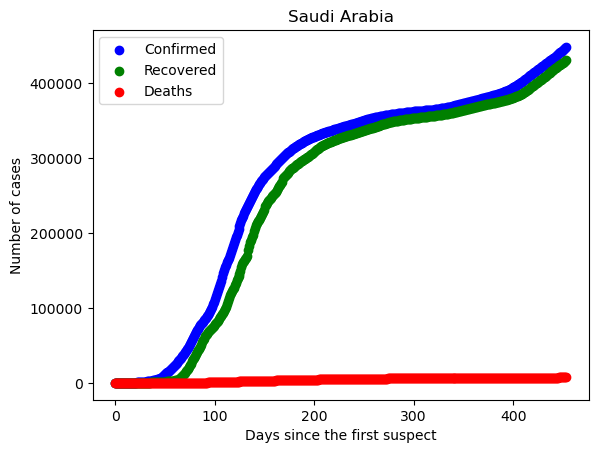

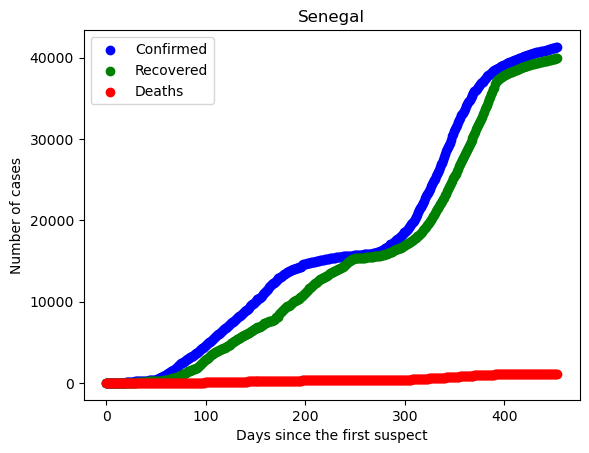

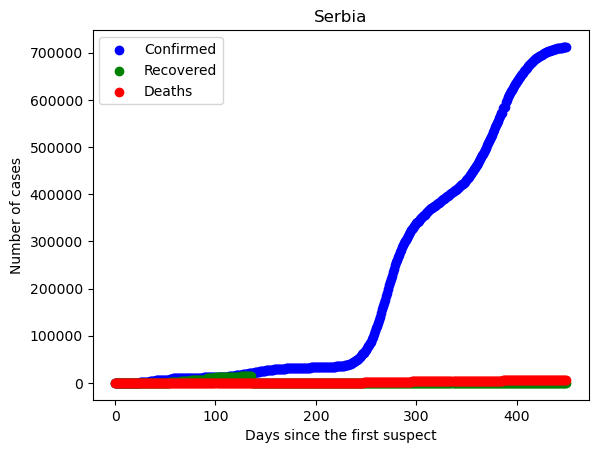

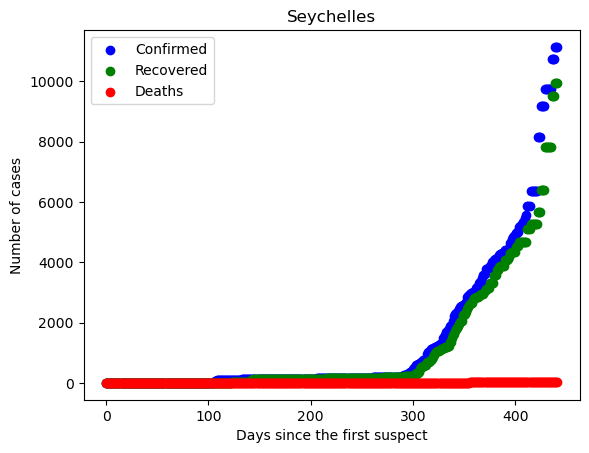

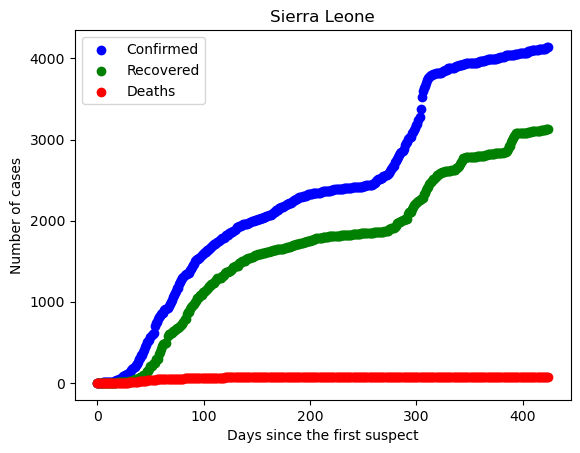

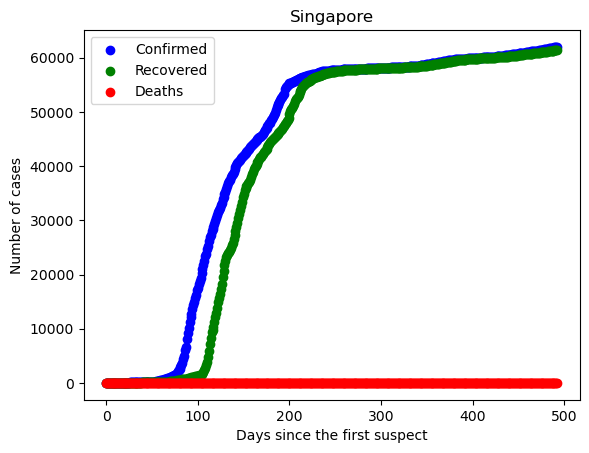

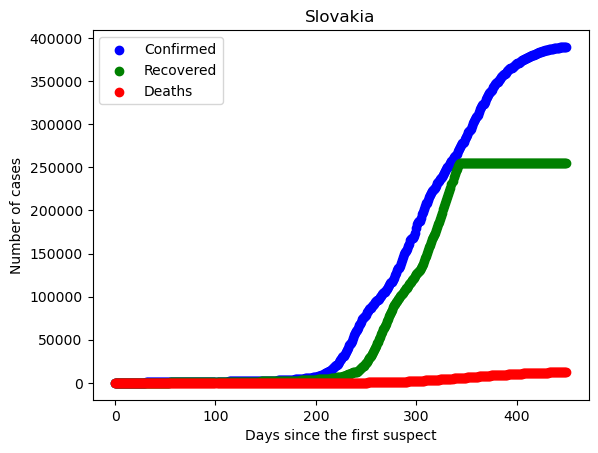

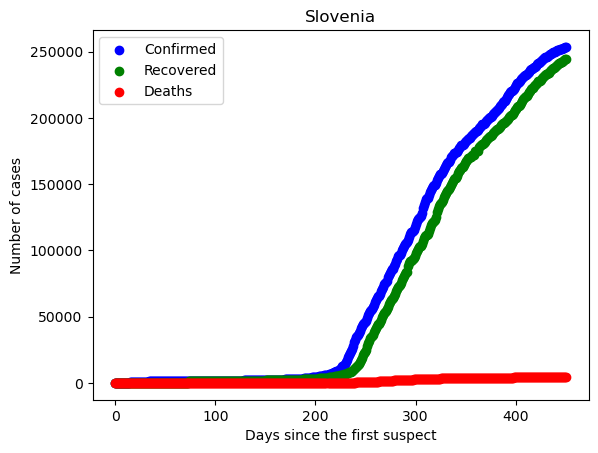

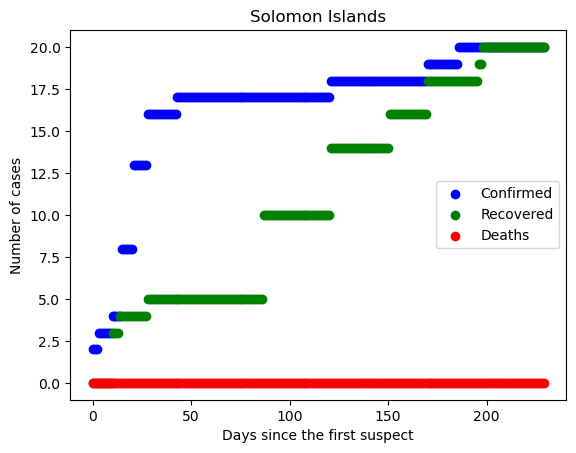

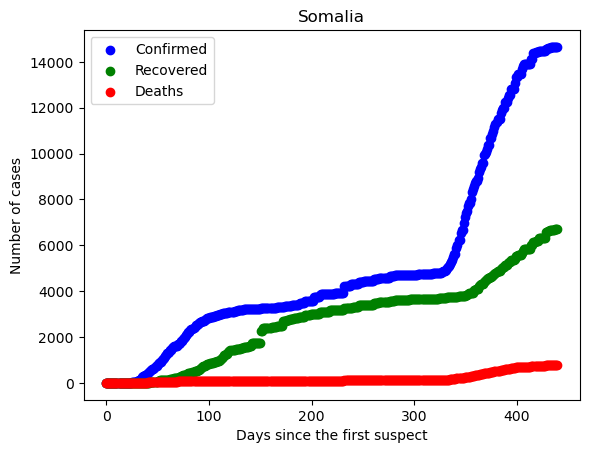

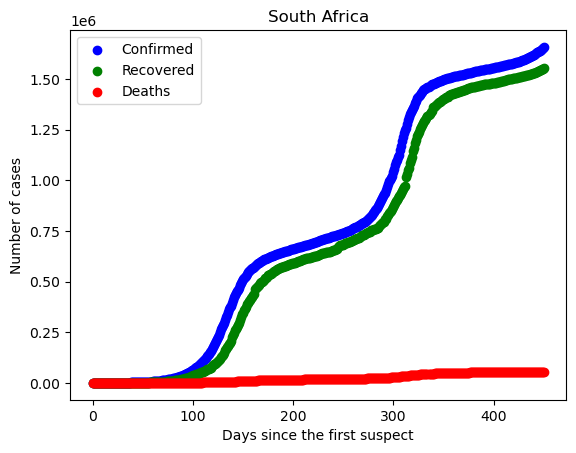

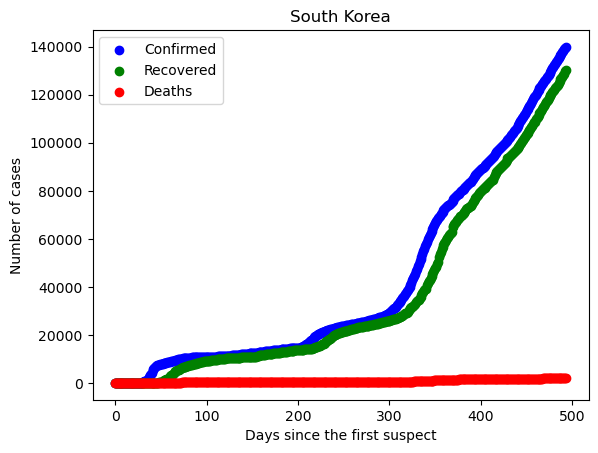

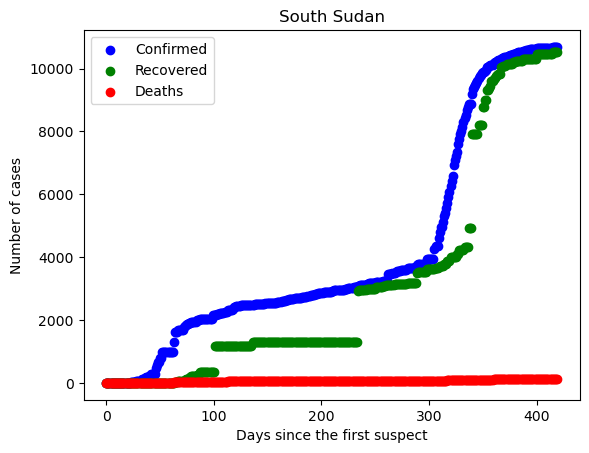

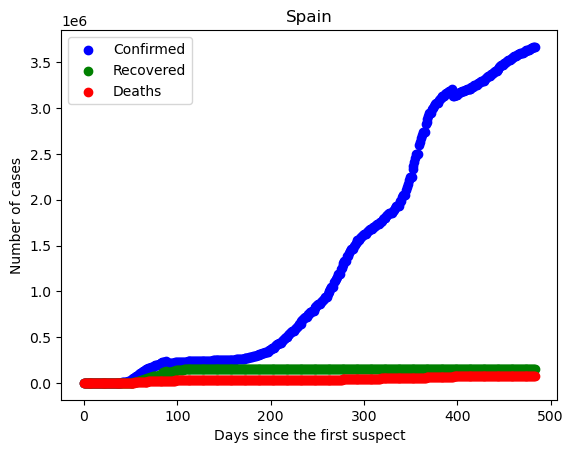

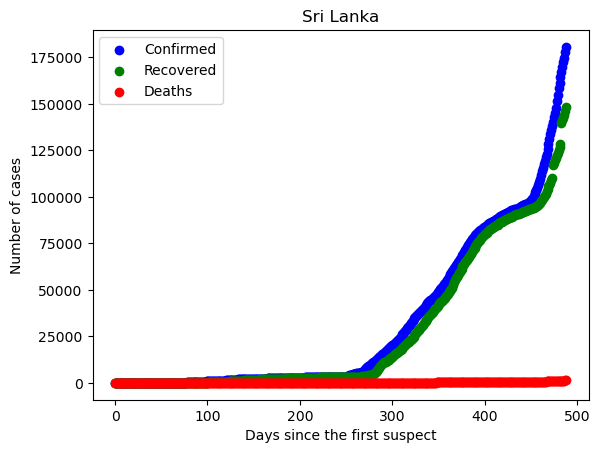

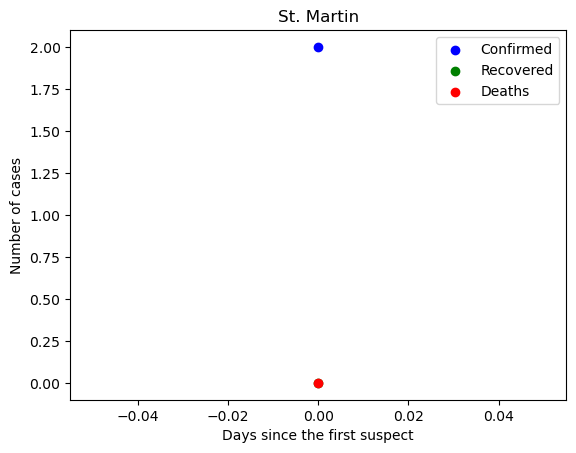

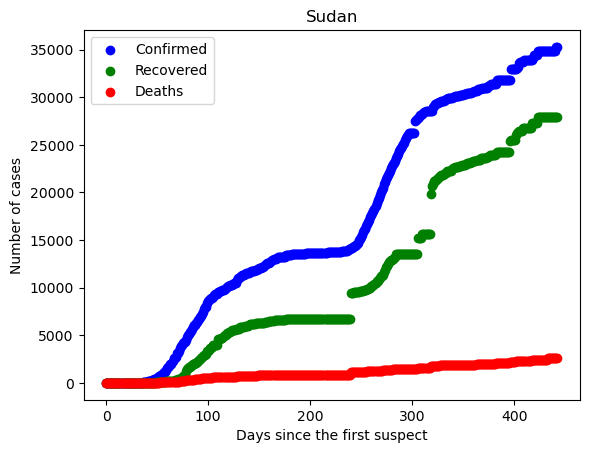

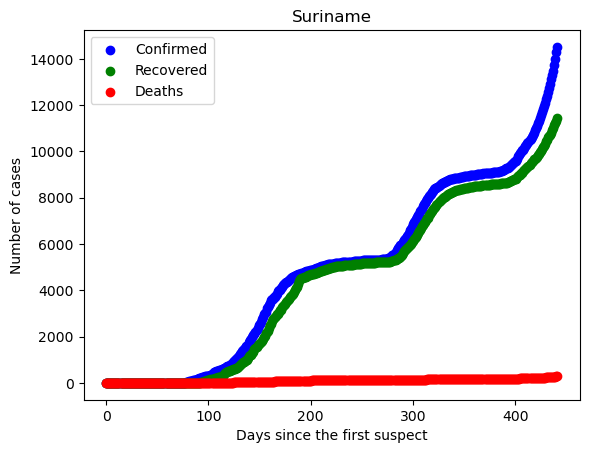

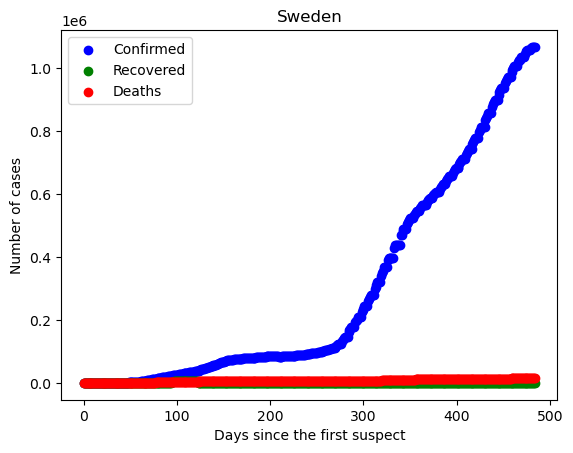

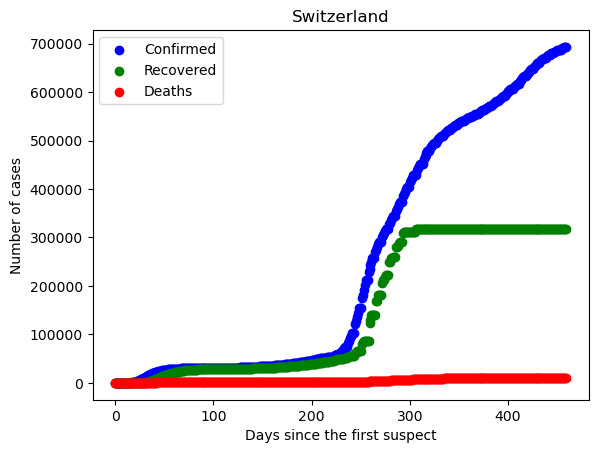

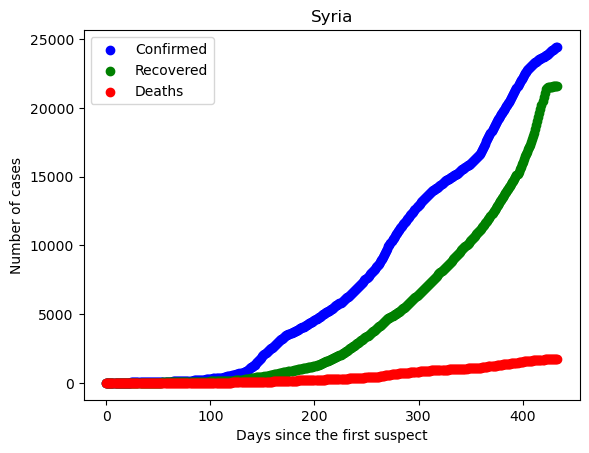

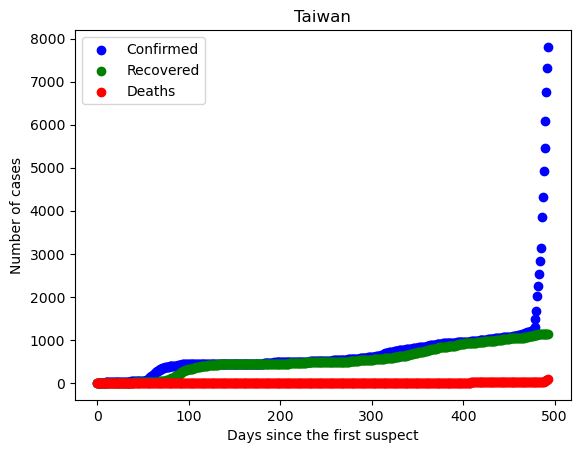

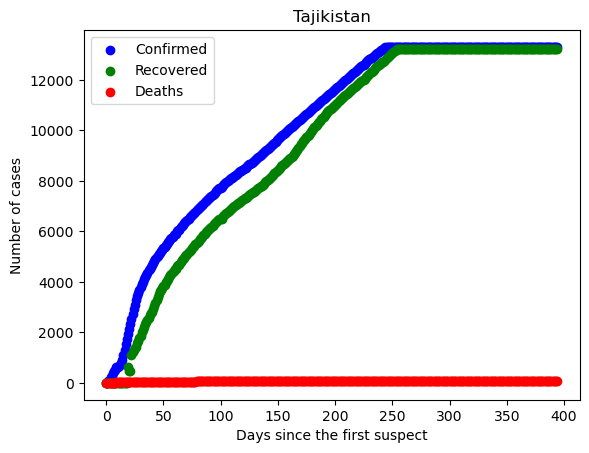

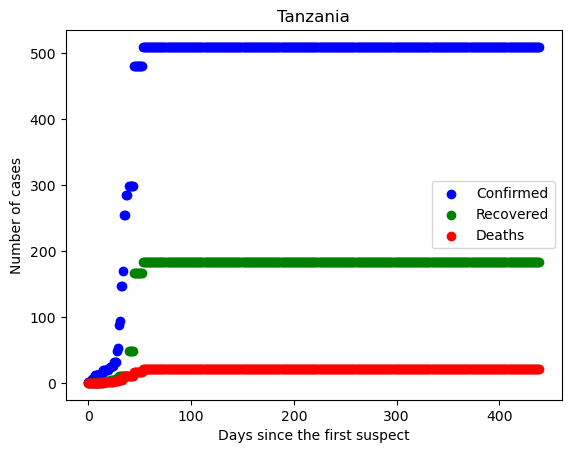

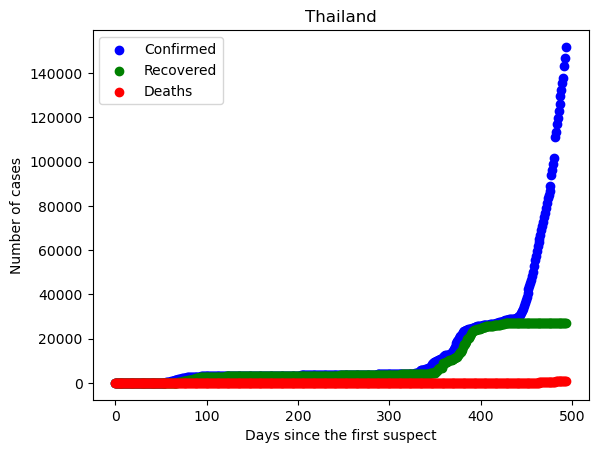

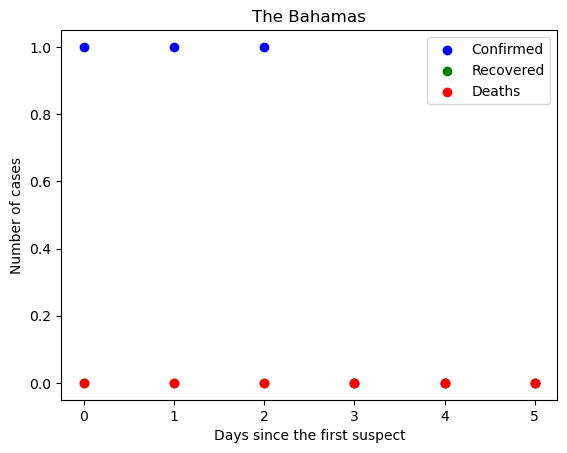

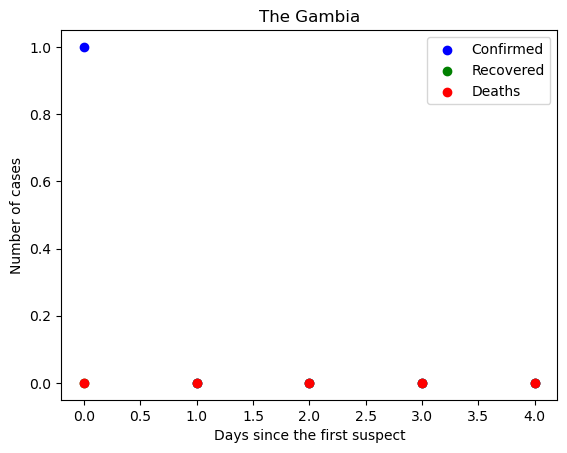

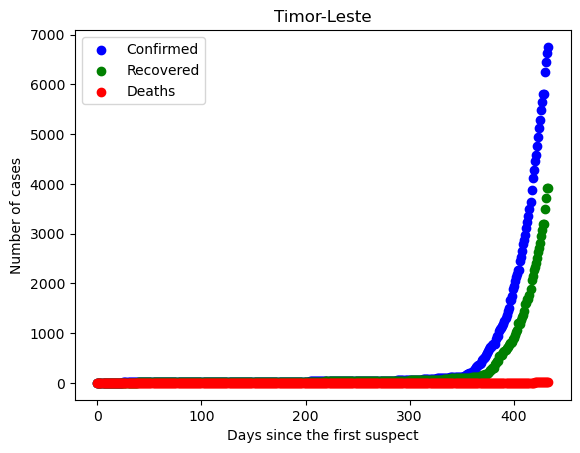

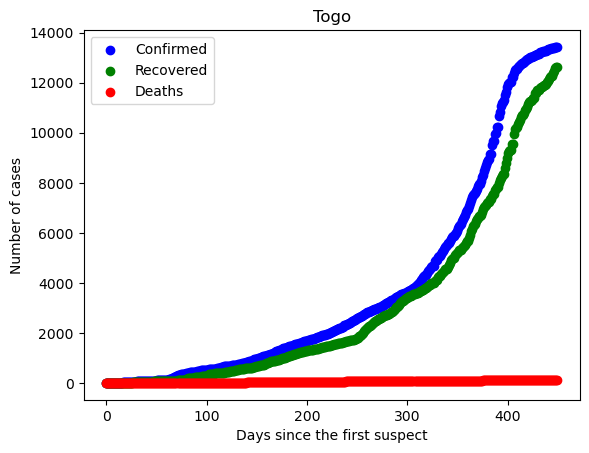

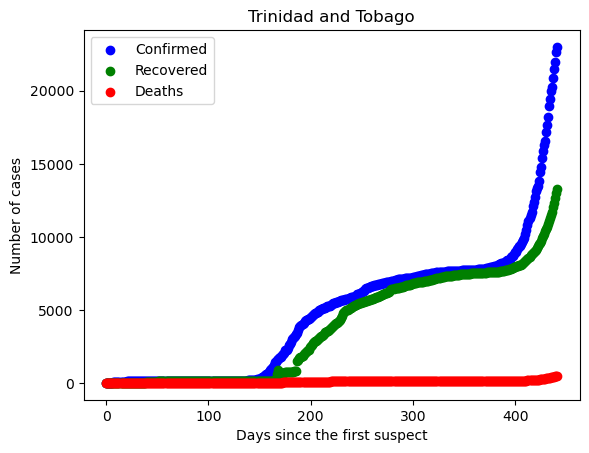

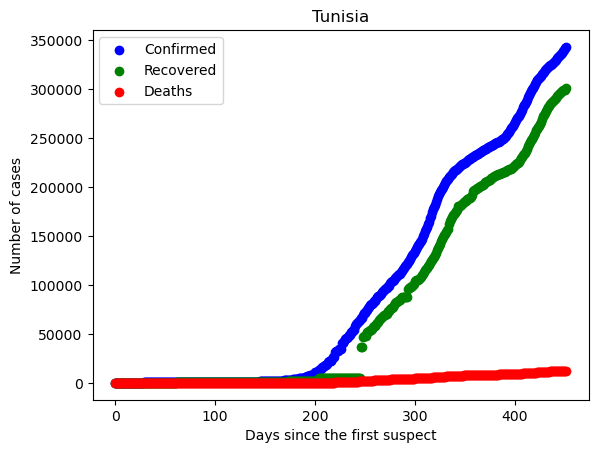

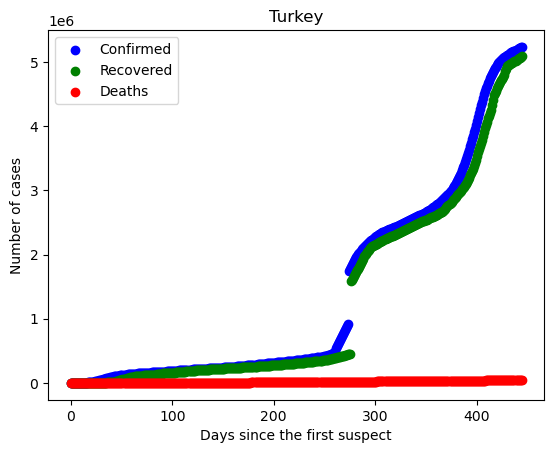

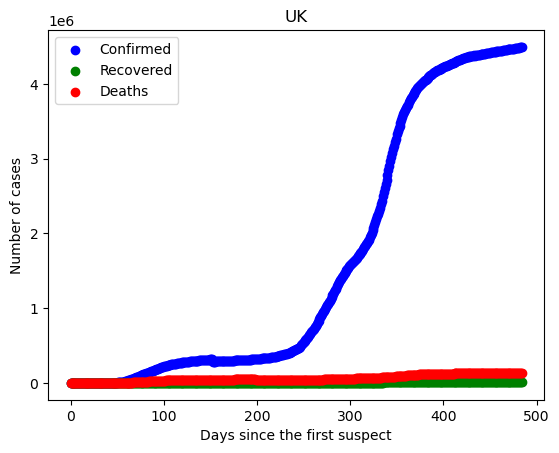

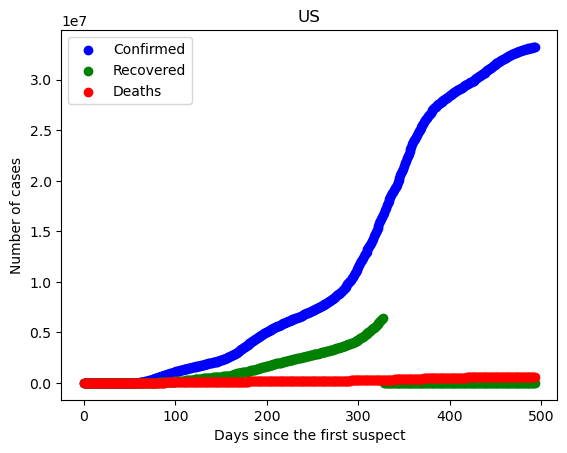

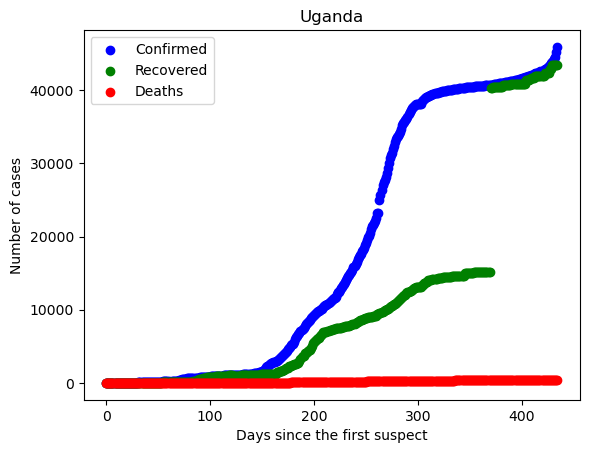

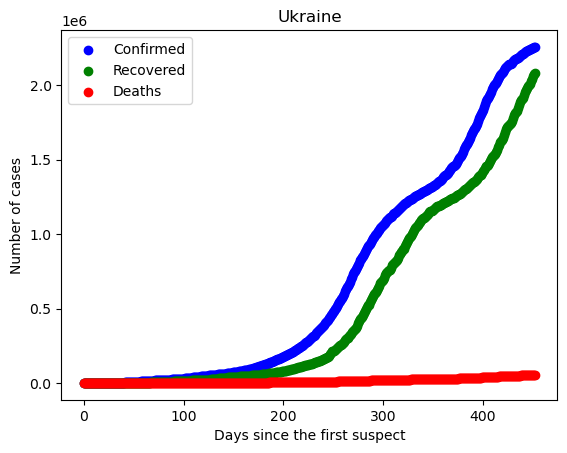

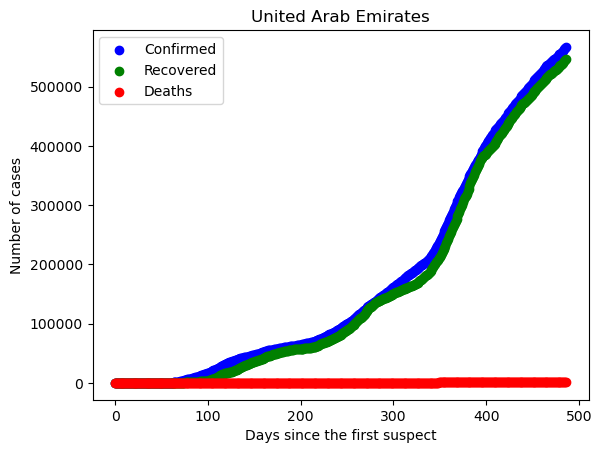

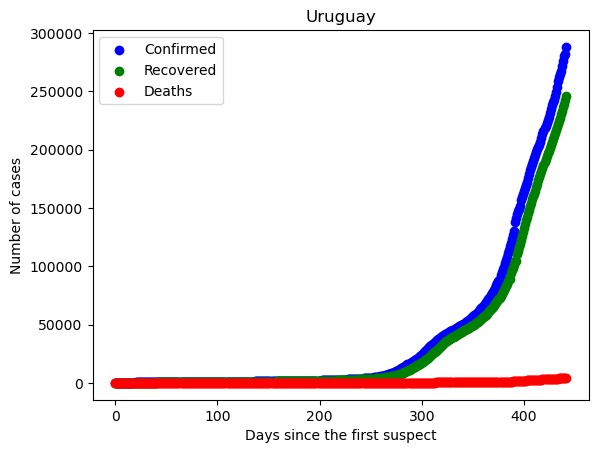

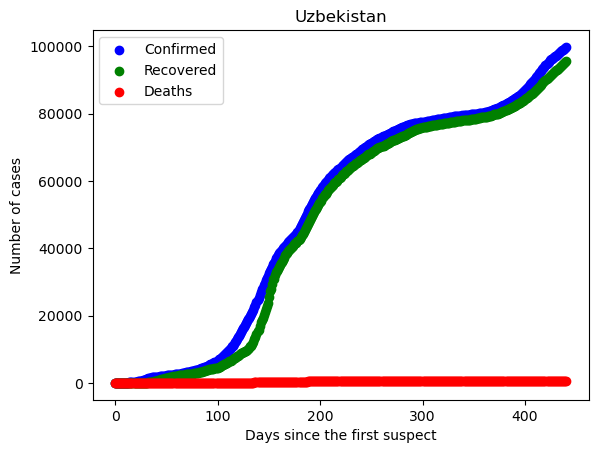

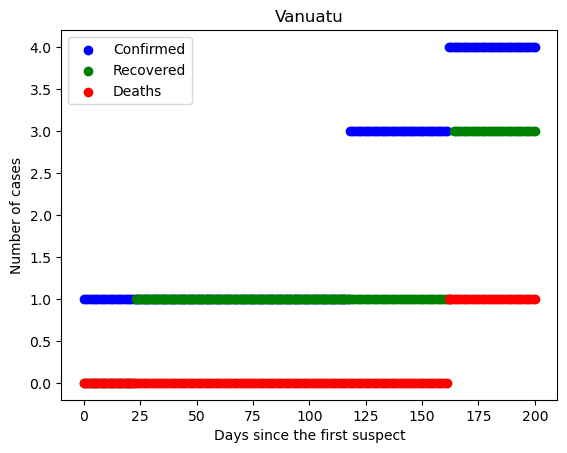

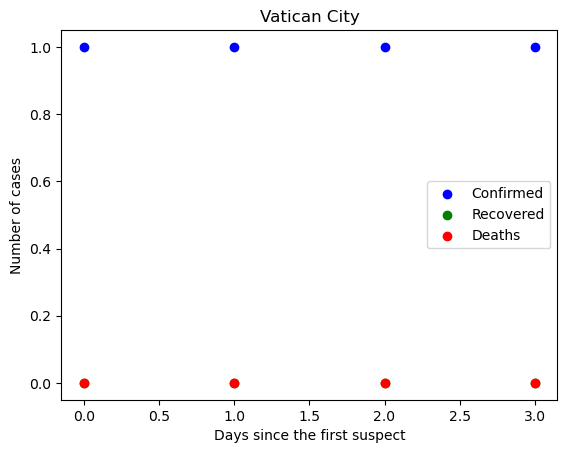

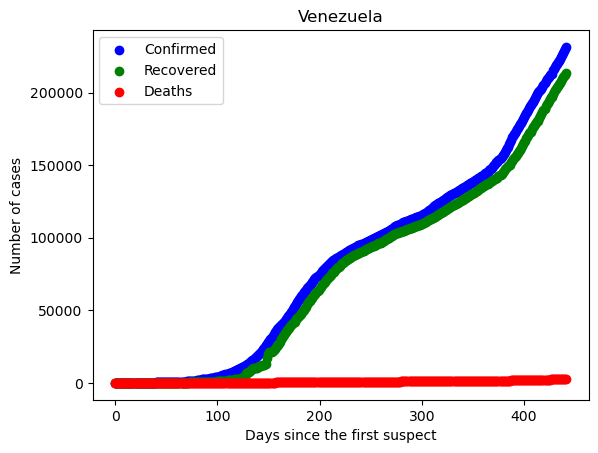

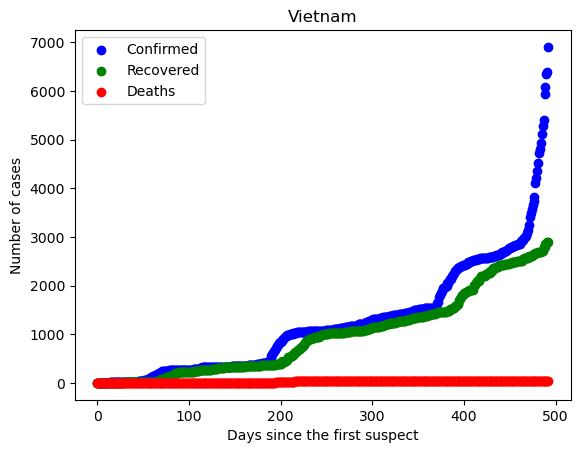

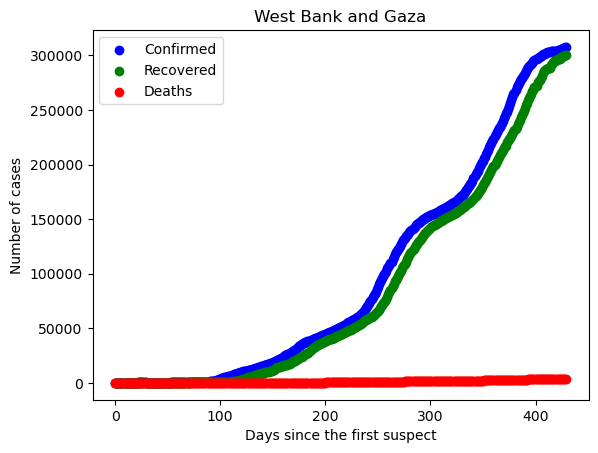

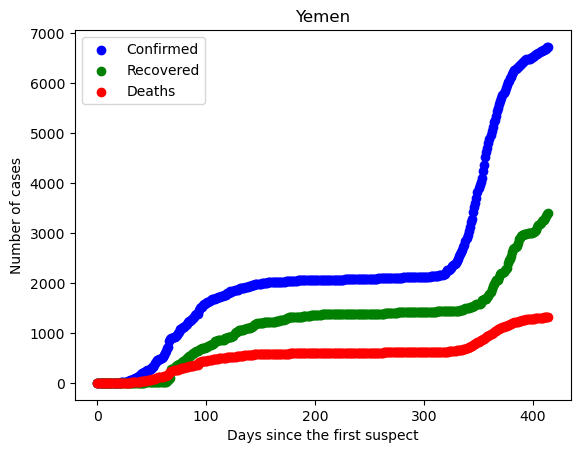

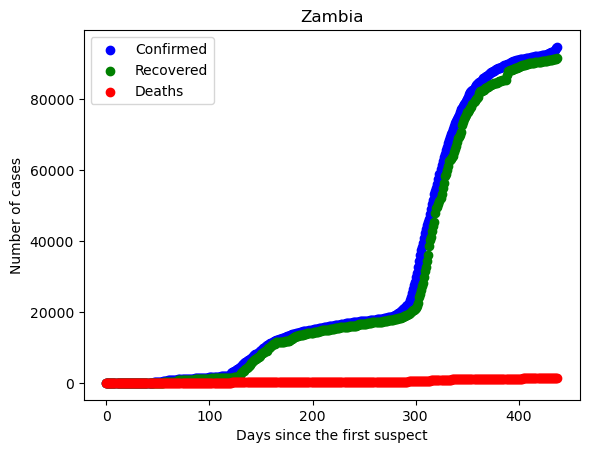

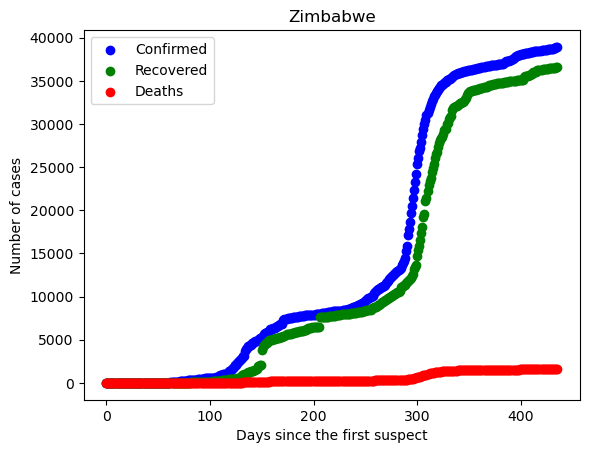

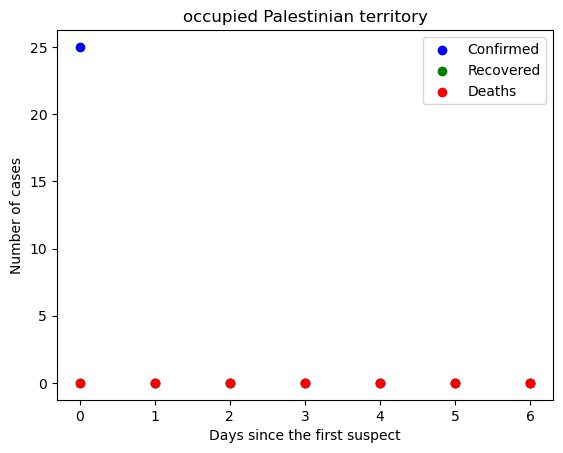

In [10]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    

In [14]:
df4 = df3.groupby(['Date'])[['Confirmed','Deaths','Recovered']].sum().reset_index()

In [15]:
df4.head(10)

Date  Confirmed  Deaths  Recovered
0 2020-01-22        557      17         30
1 2020-01-23       1097      34         60
2 2020-01-24        941      26         39
3 2020-01-25       1437      42         42
4 2020-01-26       2118      56         56
5 2020-01-27       2927      82         65
6 2020-01-28       5578     131        108
7 2020-01-29       6165     133        127
8 2020-01-30       8235     171        145
9 2020-01-31       9925     213        225

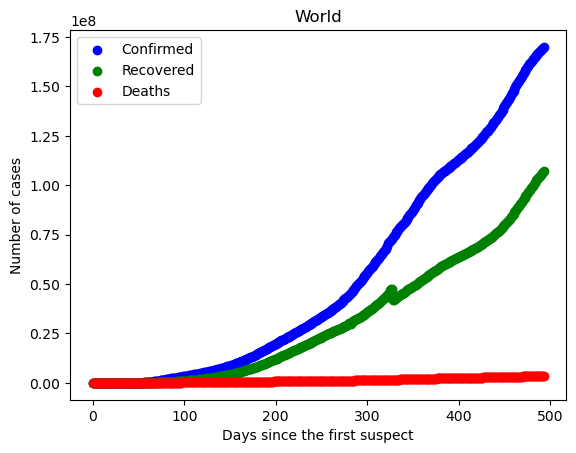

In [16]:
C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()